# Анализ лояльности пользователей Яндекс Афиши

Целью данного проекта является помощь команде маркетинга в лучшем понимании поведения пользователей Яндекс Афиши. 
Для этого проводится исследовательский анализ данных на предмет того, какие пользователи с большей вероятностью возвращаются на платформу и делают заказы повторно. 
Это позволит:
 - Быстро выявлять перспективных клиентов и предлагать им персонализированные условия.
 - Точно настраивать рекламу на аудитории с высокой вероятностью возврата.
 - Оптимизировать маркетинговые бюджеты.
 - Повысить общий уровень удержания клиентов.
 
Используемые данные:
- **Витрина заказов Яндекс Афиши** - витрина данных, собранная SQL-запросом (используя библиотеку SQLAlchemy) в базе данных Яндекс Афиши `data-analyst-afisha`.  
- **CSV-файл в сети с курсом казахского тенге** по отношению к российскому рублю за 2024 год (значения для 100 казахских тенге). 
 
В процессе исследования получим ответ на следующие вопросы (проверим гипотезы):
 - Равномерно ли распределены пользователи по сегментам или есть выраженные «точки входа» — сегменты с наибольшим числом пользователей?
 - Какие сегменты пользователей чаще возвращаются на Яндекс Афишу? Наблюдаются ли успешные «точки входа» — такие сегменты, в которых пользователи чаще совершают повторный заказ, чем в среднем по выборке? 
 - Опираясь на ранее сделанные выводы, проверим продуктовые гипотезы:
  - Гипотеза 1. Тип мероприятия влияет на вероятность возврата на Яндекс Афишу: пользователи, которые совершили первый заказ на спортивные мероприятия, совершают повторный заказ чаще, чем пользователи, оформившие свой первый заказ на концерты.
  - Гипотеза 2. В регионах, где больше всего пользователей посещают мероприятия, выше доля повторных заказов, чем в менее активных регионах.
 - Проследим связь между средней выручкой сервиса с заказа и повторными заказами.Ответим на вопросы: 
  - В каких диапазонах средней выручки концентрируются пользователи из каждой группы?
  - Есть ли различия между группами?
 - Сравним распределение по средней выручке с заказа в двух группах пользователей: совершившие 2–4 заказа, совершившие 5 и более заказов. Ответим на вопрос: есть ли различия по значению средней выручки с заказа между пользователями этих двух групп?
 - Проанализируем влияние среднего количества билетов в заказе на вероятность повторной покупки. Изучем распределение пользователей по среднему количеству билетов в заказе (от 1 до 2 билетов, от 2 до 3 билетов, от 3 до 5 билетов, от 5 и более билетов) и опишем основные наблюдения. Ответим на вопросы:
  - Как распределены пользователи по сегментам — равномерно или сконцентрировано?
  - Есть ли сегменты с аномально высокой или низкой долей повторных покупок?
 - Изучим временные параметры, связанные с первым заказом пользователей: день недели первой покупки, время с момента первой покупки — лайфтайм, средний интервал между покупками пользователей с повторными заказами.
  - Проанализируем, как день недели, в которой была совершена первая покупка, влияет на поведение пользователей. Ответим на вопрос: влияет ли день недели, в которую совершена первая покупка, на вероятность возврата клиента?
  - Изучим, как средний интервал между заказами влияет на удержание клиентов и опишем сделанные выводы.
 - Проведем корреляционный анализ: рассчитаем коэффициент корреляции `phi_k` между признаками профиля пользователя и числом заказов. Ответим на вопрос: какие признаки наиболее связаны с количеством заказов?

## Этапы выполнения проекта

1. Загрузка данных и их предобработка (загрузка и первичное исследование и проверка данных Яндекс Афиши).
2. Предобработка данных (приведение валюты к российским рублям и обработка типов данных, пропусков, дубликатов).
3. Создание профиля пользователя (создание модели для прогнозирования возврата пользователей, построиение агрегированных признаков, описывающих поведение и профиль каждого пользователя).
4. Исследовательский анализ данных (исследование признаков, влияющих на возврат пользователей).
5. Общие выводы и рекомендации.

### 1. Загрузка данных и их предобработка

**Первый источник данных** - витрина данных, собранная SQL-запросом (используя библиотеку SQLAlchemy) в базе данных Яндекс Афиши `data-analyst-afisha`. 
Витрина данных содержит следующие признаки:
- `user_id` — уникальный идентификатор пользователя, совершившего заказ;
- `device_type_canonical` — тип устройства, с которого был оформлен заказ (`mobile` — мобильные устройства, `desktop` — стационарные);
- `order_id` — уникальный идентификатор заказа;
- `order_dt` — дата создания заказа (используйте данные `created_dt_msk`);
- `order_ts` — дата и время создания заказа (используйте данные `created_ts_msk`);
- `currency_code` — валюта оплаты;
- `revenue` — выручка от заказа;
- `tickets_count` — количество купленных билетов;
- `days_since_prev` — количество дней от предыдущей покупки пользователя, для пользователей с одной покупкой — значение пропущено;
- `event_id` — уникальный идентификатор мероприятия;
- `service_name` — название билетного оператора;
- `event_type_main` — основной тип мероприятия (театральная постановка, концерт и так далее);
- `region_name` — название региона, в котором прошло мероприятие;
- `city_name` — название города, в котором прошло мероприятие.

In [1]:
!pip install phik
!pip install dotenv

     |████████████████████████████████| 677 kB 2.3 MB/s eta 0:00:01


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import phik
from sqlalchemy import create_engine
from dotenv import load_dotenv
import os

***Изменить блок на MD при развертывании локально или в GIT***

In [3]:
db_config = {'user': 'praktikum_student', # имя пользователя
             'pwd': 'Sdf4$2;d-d30pp', # пароль
             'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
             'port': 6432, # порт подключения
             'db': 'data-analyst-afisha' # название базы данных
             } 
connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(
    db_config['user'],
    db_config['pwd'],
    db_config['host'],
    db_config['port'],
    db_config['db'],
) 

***Изменить блок на код при развертывании локально или в GIT***

load_dotenv()

db_user = os.getenv("DB_USER")
db_password = os.getenv("DB_PASSWORD")
db_host = os.getenv("DB_HOST")
db_port = os.getenv("DB_PORT")
db_name = os.getenv("DB_NAME")

connection_string = f"postgresql://{db_user}:{db_password}@{db_host}:{db_port}/{db_name}"

In [4]:
engine = create_engine(connection_string)

query = '''
SELECT 
    user_id,
    device_type_canonical,
    order_id,
    created_dt_msk as order_dt,
    created_ts_msk as order_ts,
    currency_code,
    revenue,
    tickets_count,
    created_dt_msk::date - LAG(created_dt_msk::date) OVER(PARTITION BY user_id ORDER BY created_dt_msk ASC) AS days_since_prev,
    event_id,
    service_name,
    event_type_main,
    region_name,
    city_name
FROM afisha.purchases
    INNER JOIN afisha.events as e USING(event_id)
    INNER JOIN afisha.city USING(city_id)
    INNER JOIN afisha.regions USING(region_id)
WHERE device_type_canonical IN ('desktop', 'mobile') AND e.event_type_main <> 'фильм'

'''

df = pd.read_sql_query(query, con=engine)

Проведем первичный анализ загруженных данных

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290611 entries, 0 to 290610
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   user_id                290611 non-null  object        
 1   device_type_canonical  290611 non-null  object        
 2   order_id               290611 non-null  int64         
 3   order_dt               290611 non-null  datetime64[ns]
 4   order_ts               290611 non-null  datetime64[ns]
 5   currency_code          290611 non-null  object        
 6   revenue                290611 non-null  float64       
 7   tickets_count          290611 non-null  int64         
 8   days_since_prev        268678 non-null  float64       
 9   event_id               290611 non-null  int64         
 10  service_name           290611 non-null  object        
 11  event_type_main        290611 non-null  object        
 12  region_name            290611 non-null  obje

In [6]:
df.head(10)

,user_id,device_type_canonical,order_id,order_dt,order_ts,currency_code,revenue,tickets_count,days_since_prev,event_id,service_name,event_type_main,region_name,city_name
0,0002849b70a3ce2,mobile,4359165,2024-08-20,2024-08-20 16:08:03,rub,1521.94,4,NaN,169230,Край билетов,театр,Каменевский регион,Глиногорск
1,0005ca5e93f2cf4,mobile,7965605,2024-07-23,2024-07-23 18:36:24,rub,289.45,2,NaN,237325,Мой билет,выставки,Каменевский регион,Глиногорск
2,0005ca5e93f2cf4,mobile,7292370,2024-10-06,2024-10-06 13:56:02,rub,1258.57,4,75.0,578454,За билетом!,другое,Каменевский регион,Глиногорск
3,000898990054619,mobile,1139875,2024-07-13,2024-07-13 19:40:48,rub,8.49,2,NaN,387271,Лови билет!,другое,Североярская область,Озёрск
4,000898990054619,mobile,972400,2024-10-04,2024-10-04 22:33:15,rub,1390.41,3,83.0,509453,Билеты без проблем,стендап,Озернинский край,Родниковецк
5,000898990054619,mobile,2613713,2024-10-23,2024-10-23 15:12:00,rub,902.74,3,19.0,500862,Облачко,концерты,Лугоградская область,Кристалевск
6,00096d1f542ab2b,desktop,6636941,2024-08-15,2024-08-15 16:48:48,rub,917.83,4,NaN,201953,Край билетов,театр,Каменевский регион,Глиногорск
7,000a55a418c128c,mobile,4657981,2024-09-29,2024-09-29 19:39:12,rub,47.78,1,NaN,265857,Лучшие билеты,театр,Поленовский край,Дальнозолотск
8,000a55a418c128c,mobile,4657952,2024-10-15,2024-10-15 10:29:04,rub,74.84,2,16.0,271579,Лучшие билеты,театр,Поленовский край,Дальнозолотск
9,000cf0659a9f40f,mobile,6818191,2024-06-20,2024-06-20 10:51:10,rub,1421.91,4,NaN,516728,Лови билет!,концерты,Широковская область,Радужнополье


Изучим пропуски в колонке `days_since_prev`

In [7]:
df['days_since_prev'].value_counts(dropna=False)

0.0      184052
1.0       30472
NaN       21933
2.0        9947
3.0        6182
          ...  
145.0         3
143.0         3
147.0         3
141.0         2
140.0         1
Name: days_since_prev, Length: 150, dtype: int64

Оценим долю пропусков к колонке `days_since_prev`

In [8]:
df['days_since_prev'].isna().sum() / df.shape[0]

0.07547202273829966

Изучим типы данных в колонках `order_id`, `event_id`

In [9]:
df['order_id'].min()

1

In [10]:
df['order_id'].max()

8653108

In [11]:
df['event_id'].min()

4436

In [12]:
df['event_id'].max()

592325

Проверим уникальные значения в категориальных столбцах

In [13]:
categorical_cols = [
    'device_type_canonical',
    'currency_code',
    'service_name',
    'event_type_main',
    'region_name',
    'city_name'
]

for col in categorical_cols:
    print(f"{col} количество уникальных значений: {df[col].nunique()}")
    print(f"{col} количество пропусков: {df[col].isna().sum()}")
    print(f"{col} количество уникальных значений с нормализацией данных: {df[col].str.lower().nunique()}")
    print(f"{col} частота уникальных значений: {df[col].value_counts(dropna=False)}")
    print(f"{col}: {sorted(df[col].unique())}")

device_type_canonical количество уникальных значений: 2
device_type_canonical количество пропусков: 0
device_type_canonical количество уникальных значений с нормализацией данных: 2
device_type_canonical частота уникальных значений: mobile     232490
desktop     58121
Name: device_type_canonical, dtype: int64
device_type_canonical: ['desktop', 'mobile']
currency_code количество уникальных значений: 2
currency_code количество пропусков: 0
currency_code количество уникальных значений с нормализацией данных: 2
currency_code частота уникальных значений: rub    285542
kzt      5069
Name: currency_code, dtype: int64
currency_code: ['kzt', 'rub']
service_name количество уникальных значений: 36
service_name количество пропусков: 0
service_name количество уникальных значений с нормализацией данных: 36
service_name частота уникальных значений: Билеты без проблем        63519
Лови билет!               41124
Билеты в руки             40343
Мой билет                 34839
Облачко                   2

Проверим полные дубликаты:

In [14]:
df.duplicated().sum()

0

Полных дубликатов нет

Проверим дубликаты по отдельным колонкам (наборм колонок):

In [15]:
# Проверим дубликаты по столбцу order_id
print(f"Количество дубликатов в столбце order_id: {df.duplicated(subset=['order_id']).sum()}")

Количество дубликатов в столбце order_id: 0


Дубликатов заказов нет

Проверим дубликаты по набору столбцов user_id, order_ts, revenue_rub, event_id (подозрительные дубликаты):

In [16]:
#Проверим дубликаты по столбцам user_id, order_ts, revenue_rub, event_id
df[df.duplicated(subset=['user_id', 'order_ts', 'revenue', 'event_id'], keep=False)].sort_values(by=['user_id', 'order_ts', 'revenue', 'event_id'])

,user_id,device_type_canonical,order_id,order_dt,order_ts,currency_code,revenue,tickets_count,days_since_prev,event_id,service_name,event_type_main,region_name,city_name
11758,06eb7897f65b433,mobile,1123983,2024-08-13,2024-08-13 16:31:07,rub,69.82,1,0.0,183706,Билеты в руки,театр,Светополянский округ,Глиноград
11759,06eb7897f65b433,mobile,1123867,2024-08-13,2024-08-13 16:31:07,rub,69.82,1,0.0,183706,Билеты в руки,театр,Светополянский округ,Глиноград
12677,08199117318954f,desktop,5592970,2024-07-31,2024-07-31 11:52:06,rub,0.00,3,0.0,553623,Билеты без проблем,другое,Каменевский регион,Глиногорск
12678,08199117318954f,mobile,5593202,2024-07-31,2024-07-31 11:52:06,rub,0.00,3,0.0,553623,Билеты без проблем,другое,Каменевский регион,Глиногорск
26868,0dc525d7bacbb0d,desktop,1930763,2024-07-31,2024-07-31 13:26:11,rub,1556.05,3,11.0,393430,Лови билет!,концерты,Каменевский регион,Глиногорск
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285379,fd4d47438ebb946,desktop,8548099,2024-06-19,2024-06-19 15:40:56,rub,989.57,3,0.0,489843,Билеты без проблем,театр,Каменевский регион,Глиногорск
285388,fd4d47438ebb946,desktop,8547809,2024-06-19,2024-06-19 15:40:56,rub,989.57,3,0.0,489843,Билеты без проблем,театр,Каменевский регион,Глиногорск
285375,fd4d47438ebb946,desktop,8547867,2024-06-19,2024-06-19 15:40:56,rub,1319.43,4,0.0,489843,Билеты без проблем,театр,Каменевский регион,Глиногорск
285382,fd4d47438ebb946,desktop,8548012,2024-06-19,2024-06-19 15:40:56,rub,1319.43,4,0.0,489843,Билеты без проблем,театр,Каменевский регион,Глиногорск


In [17]:
df.duplicated(subset=['user_id', 'order_ts', 'revenue', 'event_id'], keep='first').sum()

48

Обнаружено 48 записей дубликатов (не считая дубликатами первые найденные записи). В дальнейшем эти дубликаты необходимо удалить.

Проверим данные в числовых столбцах на аномалии и выбросы:

In [18]:
df['tickets_count'].describe(percentiles=[0.01, 0.05, 0.25, 0.5, 0.75, 0.95, 0.97, 0.999])

count    290611.000000
mean          2.754311
std           1.170620
min           1.000000
1%            1.000000
5%            1.000000
25%           2.000000
50%           3.000000
75%           4.000000
95%           5.000000
97%           5.000000
99.9%         6.000000
max          57.000000
Name: tickets_count, dtype: float64

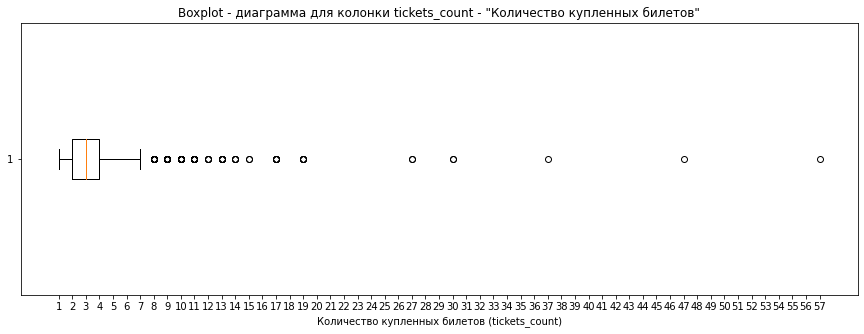

In [19]:
plt.figure(figsize=(15, 5))
plt.boxplot(df['tickets_count'], vert=False)
plt.title('Boxplot - диаграмма для колонки tickets_count - "Количество купленных билетов"')
plt.xticks(range(df['tickets_count'].min(), df['tickets_count'].max() + 1, 1))
plt.xlabel('Количество купленных билетов (tickets_count)')
plt.show()     

In [20]:
df['tickets_count'].value_counts()

3     92247
2     83807
4     54812
1     41798
5     13476
6      4283
7        62
9        38
8        21
10       19
11       13
13        7
17        6
19        5
12        4
14        4
15        2
27        2
30        2
37        1
47        1
57        1
Name: tickets_count, dtype: int64

In [21]:
df[df['tickets_count'] > 11].sort_values(by='tickets_count')

,user_id,device_type_canonical,order_id,order_dt,order_ts,currency_code,revenue,tickets_count,days_since_prev,event_id,service_name,event_type_main,region_name,city_name
33052,110125b4a429b43,mobile,8056317,2024-10-23,2024-10-23 13:49:54,rub,1708.36,12,0.0,586847,Мой билет,другое,Североярская область,Озёрск
228903,c37aeb5b39ffcca,desktop,884646,2024-09-30,2024-09-30 13:56:52,rub,710.19,12,0.0,441168,Мой билет,другое,Каменевский регион,Глиногорск
55602,23e813ef3cc7702,mobile,1916698,2024-10-24,2024-10-24 21:09:23,rub,9954.66,12,NaN,574396,Шоу начинается!,концерты,Каменевский регион,Глиногорск
97079,4678b687aef94db,mobile,2950316,2024-09-05,2024-09-05 19:50:15,rub,1504.63,12,2.0,529629,Билеты без проблем,другое,Североярская область,Озёрск
22182,0beb8fc0c0a9ce1,desktop,7486960,2024-10-08,2024-10-08 14:35:20,rub,1630.01,13,0.0,529629,Билеты без проблем,другое,Североярская область,Озёрск
29936,0f917cf4c96d1d7,mobile,4343070,2024-06-01,2024-06-01 15:14:41,rub,155.51,13,NaN,501198,Билеты в руки,другое,Заречная область,Дальнесветин
33238,1118cc4889189db,mobile,6919082,2024-10-23,2024-10-23 21:45:06,rub,978.03,13,NaN,587223,Мой билет,другое,Североярская область,Озёрск
38928,18e9aead0a393e7,desktop,6751607,2024-08-27,2024-08-27 16:02:00,rub,1630.01,13,0.0,529629,Билеты без проблем,другое,Североярская область,Озёрск
211649,b10463dc57814d9,mobile,2291233,2024-10-29,2024-10-29 10:26:44,rub,1800.31,13,0.0,247998,Билеты без проблем,театр,Каменевский регион,Глиногорск
133595,6a71629032a8560,mobile,8591309,2024-08-28,2024-08-28 18:42:27,rub,1630.01,13,3.0,529629,Билеты без проблем,другое,Североярская область,Озёрск


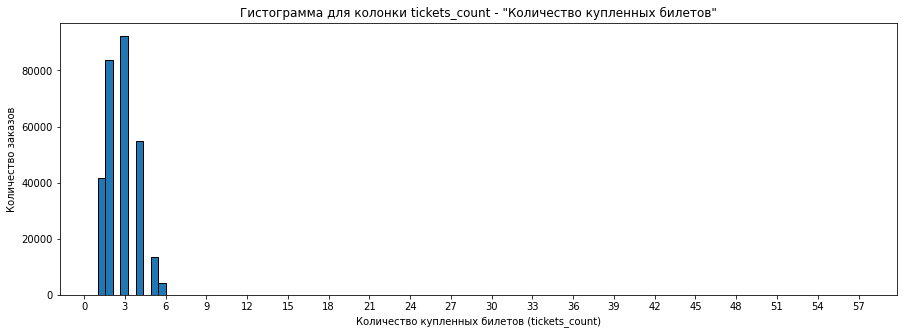

In [22]:
plt.figure(figsize=(15, 5))
plt.hist(df['tickets_count'], bins=100, edgecolor='black')
plt.title('Гистограмма для колонки tickets_count - "Количество купленных билетов"')
plt.xticks(range(0, 60, 3))
plt.xlabel('Количество купленных билетов (tickets_count)')
plt.ylabel('Количество заказов')
plt.show()

In [23]:
df['revenue'].describe(percentiles=[0.01, 0.05, 0.25, 0.5, 0.75, 0.95, 0.97, 0.99, 0.995, 0.999])

count    290611.000000
mean        625.584360
std        1227.693064
min         -90.760000
1%            0.000000
5%           16.980000
25%         116.850000
50%         356.010000
75%         810.130000
95%        1744.990000
97%        2094.180000
99%        4003.133000
99.5%      7397.660000
99.9%     17230.320000
max       81174.540000
Name: revenue, dtype: float64

In [24]:
df[df['revenue'] < 0]

,user_id,device_type_canonical,order_id,order_dt,order_ts,currency_code,revenue,tickets_count,days_since_prev,event_id,service_name,event_type_main,region_name,city_name
252,00eb3dc9baa1543,mobile,1594653,2024-06-29,2024-06-29 15:01:43,rub,-2.37,3,NaN,538650,Билеты без проблем,другое,Берёзовская область,Златопольск
4522,02ea4583333f064,mobile,2360920,2024-09-03,2024-09-03 18:12:58,rub,-0.23,3,0.0,559772,Билеты без проблем,другое,Широковская область,Лесореченск
4549,02ea4583333f064,mobile,2361094,2024-09-04,2024-09-04 09:34:53,rub,-0.15,2,0.0,559772,Билеты без проблем,другое,Широковская область,Лесореченск
8133,043f669c9f734b1,mobile,166809,2024-09-27,2024-09-27 10:56:35,rub,-0.62,1,1.0,567183,Лучшие билеты,другое,Золотоключевской край,Луговинец
8134,043f669c9f734b1,mobile,166780,2024-09-27,2024-09-27 10:00:09,rub,-1.86,3,0.0,567183,Лучшие билеты,другое,Золотоключевской край,Луговинец
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288855,fe237d2cfd6e503,mobile,3700575,2024-10-12,2024-10-12 08:11:33,rub,-5.70,1,0.0,247058,Тебе билет!,концерты,Речицкая область,Радужанов
288903,fe237d2cfd6e503,desktop,3523646,2024-10-15,2024-10-15 20:32:18,rub,-1.43,3,0.0,243963,Лучшие билеты,другое,Ягодиновская область,Речинцево
288904,fe237d2cfd6e503,desktop,3523617,2024-10-15,2024-10-15 20:13:13,rub,-0.96,2,0.0,243963,Лучшие билеты,другое,Ягодиновская область,Речинцево
289052,fe237d2cfd6e503,mobile,5445853,2024-10-21,2024-10-21 20:22:29,rub,-0.61,1,0.0,243393,Лучшие билеты,другое,Ягодиновская область,Речинцево


In [25]:
df[df['revenue'] == 0]

,user_id,device_type_canonical,order_id,order_dt,order_ts,currency_code,revenue,tickets_count,days_since_prev,event_id,service_name,event_type_main,region_name,city_name
24,0018ecd8a38a51b,mobile,3253250,2024-07-25,2024-07-25 20:38:57,rub,0.0,3,NaN,548041,Билеты без проблем,спорт,Медовская область,Радужсвет
65,0033403583a55ed,mobile,4130500,2024-06-19,2024-06-19 11:07:15,rub,0.0,1,NaN,538926,Билеты без проблем,другое,Каменевский регион,Глиногорск
66,0033403583a55ed,mobile,4130529,2024-06-19,2024-06-19 10:53:29,rub,0.0,1,0.0,538926,Билеты без проблем,другое,Каменевский регион,Глиногорск
67,0033403583a55ed,mobile,4130442,2024-06-19,2024-06-19 14:57:25,rub,0.0,1,0.0,538926,Билеты без проблем,другое,Каменевский регион,Глиногорск
68,0033403583a55ed,mobile,4130471,2024-06-19,2024-06-19 11:06:10,rub,0.0,1,0.0,538926,Билеты без проблем,другое,Каменевский регион,Глиногорск
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290144,ff431fb03dba1e6,mobile,3262211,2024-08-07,2024-08-07 12:46:13,rub,0.0,4,0.0,555672,Билеты без проблем,концерты,Каменевский регион,Глиногорск
290238,ff684621b134cc4,desktop,5434427,2024-06-09,2024-06-09 12:35:52,rub,0.0,3,1.0,524592,Лучшие билеты,другое,Североярская область,Озёрск
290375,ff9310a90294d5c,mobile,388514,2024-07-30,2024-07-30 17:16:52,rub,0.0,3,6.0,553825,Лови билет!,спорт,Каменевский регион,Глиногорск
290376,ff9310a90294d5c,mobile,388485,2024-07-30,2024-07-30 17:15:36,rub,0.0,3,0.0,553825,Лови билет!,спорт,Каменевский регион,Глиногорск


In [26]:
revenue_995 = df['revenue'].quantile(0.995)
df[(df['revenue'] >= revenue_995)]

,user_id,device_type_canonical,order_id,order_dt,order_ts,currency_code,revenue,tickets_count,days_since_prev,event_id,service_name,event_type_main,region_name,city_name
277,00f4f5244501ce6,mobile,720419,2024-06-11,2024-06-11 20:15:57,kzt,22021.55,5,NaN,536826,Мой билет,концерты,Верхоречная область,Серебрянка
460,01370a0e9c1a7d5,mobile,2229811,2024-06-04,2024-06-04 13:19:47,kzt,7397.66,4,1.0,533803,Мой билет,концерты,Шанырский регион,Широковка
461,01370a0e9c1a7d5,mobile,2229724,2024-06-04,2024-06-04 13:25:28,kzt,7397.66,4,0.0,533803,Мой билет,концерты,Шанырский регион,Широковка
464,01370a0e9c1a7d5,desktop,5227657,2024-06-04,2024-06-04 13:28:17,kzt,7397.66,4,0.0,533803,Мой билет,концерты,Шанырский регион,Широковка
809,019fa401ddb00aa,mobile,4451269,2024-06-11,2024-06-11 12:33:38,kzt,22021.55,5,2.0,536826,Мой билет,концерты,Верхоречная область,Серебрянка
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289650,fe936ae193261e0,mobile,2043341,2024-06-14,2024-06-14 16:13:04,kzt,17617.24,4,0.0,536826,Мой билет,концерты,Верхоречная область,Серебрянка
289651,fe936ae193261e0,mobile,2043283,2024-06-14,2024-06-14 17:07:20,kzt,13212.93,3,0.0,536826,Мой билет,концерты,Верхоречная область,Серебрянка
290058,ff20aac2834373f,mobile,4350755,2024-10-18,2024-10-18 14:52:42,kzt,9471.05,4,34.0,538828,Билеты без проблем,концерты,Верхоречная область,Серебрянка
290077,ff3c5654070575e,mobile,1034228,2024-06-07,2024-06-07 19:03:48,kzt,7397.66,4,1.0,533803,Мой билет,концерты,Шанырский регион,Широковка


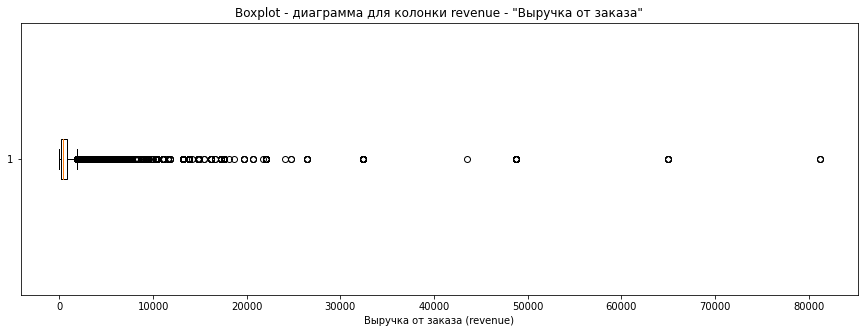

In [27]:
plt.figure(figsize=(15, 5))
plt.boxplot(df['revenue'], vert=False)
plt.title('Boxplot - диаграмма для колонки revenue - "Выручка от заказа"')
plt.xlabel('Выручка от заказа (revenue)')
plt.show()   

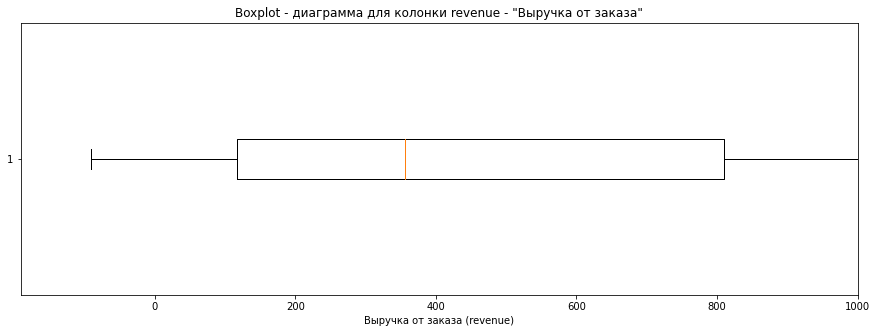

In [28]:
plt.figure(figsize=(15, 5))
plt.boxplot(df['revenue'], vert=False)
plt.title('Boxplot - диаграмма для колонки revenue - "Выручка от заказа"')
plt.xlabel('Выручка от заказа (revenue)')
plt.xlim(df['revenue'].min()-100, 1000)
plt.show()  

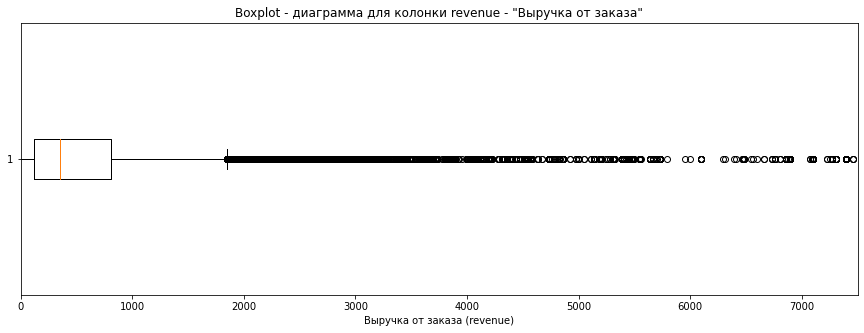

In [29]:
plt.figure(figsize=(15, 5))
plt.boxplot(df['revenue'], vert=False)
plt.title('Boxplot - диаграмма для колонки revenue - "Выручка от заказа"')
plt.xlabel('Выручка от заказа (revenue)')
plt.xlim(0, 7500)
plt.show()  

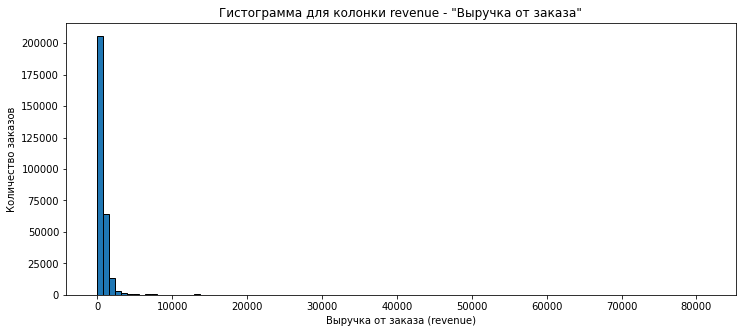

In [30]:
plt.figure(figsize=(12, 5))
plt.hist(df['revenue'], bins=100, edgecolor='black')
plt.title('Гистограмма для колонки revenue - "Выручка от заказа"')
#plt.xticks(range(-5000, 85000, 5000))
plt.xlabel('Выручка от заказа (revenue)')
plt.ylabel('Количество заказов')
plt.show()

Общие выводы по итогам загрузки данных Яндекс Афиши:

- **Размер данных:** 290611 строк и 14 столбцов, занимаемый объем - 31 Мб  
- **Качество данных:** данные соответствуют описанию, названия колонок соответствуют содержимому. 
- **Особенности пропусков:** не большое количество нулевых значений наблюдается в колонке days_since_prev (7.5%), пропуски объяснимы тем, что у пользователей может быть один (первый) заказ (нет предыдущего заказа). 
- **Колонка `days_since_prev`:** данные можно преобразовать в целочисленный тип с возможностью NaN значений(`Int32`).
- **Колонки `order_id`, `event_id`:** данные можно преобразовать в целочисленный тип с возможностью NaN значений(`Int32`).
- **Колонка `tickets_count`:** данные можно преобразовать в беззнаковый целый тип с малой размерностью (`UInt8`).
- **Колонка `revenue`:** не меняем тип данных для сохранения точности значений.
- **Категориальные данные**: явных или неявных дубликатов или аномальных значений в категориальных данных не обнаружено
- **Дубликаты**: полных явных дубликатов не обнаружено, обнаружены явные дубликаты по набору колонок user_id, order_ts, revenue_rub, event_id - 48 записей - их будем вычищать.
- **Аномалии и выбросы**
 - колонка `tickets_count`: аномальных значений не выявлено, на распределении присутствует очень тонкий и сужающийся правый хвост - крупные заказы (например, групповые) - который можно исключить из анализа по перцентилю 99.9 (ввиду статистически малого количества значений выше перецентиля 99.9).
 - колонка `revenue`: присутствуют аномальные значения (0 - возможно покупки по акции, отрицательные значения - возможно возвраты билетов) - аномальные значения для анализа возможно исключить, на распределении присутствует длинный тяжелый правый хвост, который можно исключить из анализа по перцентилю 99.5

---

###  2. Предобработка данных

Данные о выручке сервиса представлены в российских рублях и казахстанских тенге. Приведем выручку к единой валюте — российскому рублю.

Для этого используем датасет с информацией о курсе казахстанского тенге по отношению к российскому рублю за 2024 год — `final_tickets_tenge_df.csv`, расположенный в сети по пути `https://code.s3.yandex.net/datasets/final_tickets_tenge_df.csv')`

**Второй источник данных** - CSV-файл с курсами казахского теньге (KZT) к российскому рублю (RUB) за 2024 год (значения в рублях представлены для 100 тенге).

Результаты преобразования сохраним в новый столбец `revenue_rub`.

In [31]:
df_conversion = pd.read_csv('https://code.s3.yandex.net/datasets/final_tickets_tenge_df.csv')

In [32]:
df_conversion.head()

,data,nominal,curs,cdx
0,2024-01-10,100,19.9391,kzt
1,2024-01-11,100,19.7255,kzt
2,2024-01-12,100,19.5839,kzt
3,2024-01-13,100,19.4501,kzt
4,2024-01-14,100,19.4501,kzt


In [33]:
df_conversion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   data     357 non-null    object 
 1   nominal  357 non-null    int64  
 2   curs     357 non-null    float64
 3   cdx      357 non-null    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 11.3+ KB


Приведем тип данных в колонке `data` в типу `datetime64[ns]`

In [34]:
df_conversion['data'] = pd.to_datetime(df_conversion['data'])

In [35]:
df_conversion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   data     357 non-null    datetime64[ns]
 1   nominal  357 non-null    int64         
 2   curs     357 non-null    float64       
 3   cdx      357 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 11.3+ KB


Объединим датасет Яедекс Афиши с датасетом курса тенге

In [36]:
count_before_joining = df.shape[0]

In [37]:
df = df.merge(df_conversion, how='left', left_on='order_dt', right_on='data')

Удалим лишние колонки, появившиеся при объединении

In [38]:
df = df.drop(columns=['data', 'nominal', 'cdx'])

Проверим результат объединения датасетов

In [39]:
df.head(10)

,user_id,device_type_canonical,order_id,order_dt,order_ts,currency_code,revenue,tickets_count,days_since_prev,event_id,service_name,event_type_main,region_name,city_name,curs
0,0002849b70a3ce2,mobile,4359165,2024-08-20,2024-08-20 16:08:03,rub,1521.94,4,NaN,169230,Край билетов,театр,Каменевский регион,Глиногорск,18.6972
1,0005ca5e93f2cf4,mobile,7965605,2024-07-23,2024-07-23 18:36:24,rub,289.45,2,NaN,237325,Мой билет,выставки,Каменевский регион,Глиногорск,18.3419
2,0005ca5e93f2cf4,mobile,7292370,2024-10-06,2024-10-06 13:56:02,rub,1258.57,4,75.0,578454,За билетом!,другое,Каменевский регион,Глиногорск,19.6475
3,000898990054619,mobile,1139875,2024-07-13,2024-07-13 19:40:48,rub,8.49,2,NaN,387271,Лови билет!,другое,Североярская область,Озёрск,18.5010
4,000898990054619,mobile,972400,2024-10-04,2024-10-04 22:33:15,rub,1390.41,3,83.0,509453,Билеты без проблем,стендап,Озернинский край,Родниковецк,19.6648
5,000898990054619,mobile,2613713,2024-10-23,2024-10-23 15:12:00,rub,902.74,3,19.0,500862,Облачко,концерты,Лугоградская область,Кристалевск,20.0531
6,00096d1f542ab2b,desktop,6636941,2024-08-15,2024-08-15 16:48:48,rub,917.83,4,NaN,201953,Край билетов,театр,Каменевский регион,Глиногорск,18.7730
7,000a55a418c128c,mobile,4657981,2024-09-29,2024-09-29 19:39:12,rub,47.78,1,NaN,265857,Лучшие билеты,театр,Поленовский край,Дальнозолотск,19.3741
8,000a55a418c128c,mobile,4657952,2024-10-15,2024-10-15 10:29:04,rub,74.84,2,16.0,271579,Лучшие билеты,театр,Поленовский край,Дальнозолотск,19.7185
9,000cf0659a9f40f,mobile,6818191,2024-06-20,2024-06-20 10:51:10,rub,1421.91,4,NaN,516728,Лови билет!,концерты,Широковская область,Радужнополье,18.0419


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290611 entries, 0 to 290610
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   user_id                290611 non-null  object        
 1   device_type_canonical  290611 non-null  object        
 2   order_id               290611 non-null  int64         
 3   order_dt               290611 non-null  datetime64[ns]
 4   order_ts               290611 non-null  datetime64[ns]
 5   currency_code          290611 non-null  object        
 6   revenue                290611 non-null  float64       
 7   tickets_count          290611 non-null  int64         
 8   days_since_prev        268678 non-null  float64       
 9   event_id               290611 non-null  int64         
 10  service_name           290611 non-null  object        
 11  event_type_main        290611 non-null  object        
 12  region_name            290611 non-null  obje

Проверим неизменность размера датасета (избыточная проверка при left-join'е, но лучше быть бдительным всегда) 

In [41]:
df.shape[0] - count_before_joining

0

Сохраним количество строк а датасете до преобразований

In [42]:
count_before_transforming = df.shape[0]

In [43]:
df['revenue_rub'] = df['revenue'].where(df['currency_code'] == 'rub', df['revenue'] * df['curs'] / 100)

Колонка с курсом нам более не понадобится, удаляем

In [44]:
df = df.drop(columns=['curs'])

In [45]:
df.shape[0] - count_before_transforming

0

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290611 entries, 0 to 290610
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   user_id                290611 non-null  object        
 1   device_type_canonical  290611 non-null  object        
 2   order_id               290611 non-null  int64         
 3   order_dt               290611 non-null  datetime64[ns]
 4   order_ts               290611 non-null  datetime64[ns]
 5   currency_code          290611 non-null  object        
 6   revenue                290611 non-null  float64       
 7   tickets_count          290611 non-null  int64         
 8   days_since_prev        268678 non-null  float64       
 9   event_id               290611 non-null  int64         
 10  service_name           290611 non-null  object        
 11  event_type_main        290611 non-null  object        
 12  region_name            290611 non-null  obje

**Проверим данные на пропущенные значения. Если выгрузка из SQL была успешной, то пропуски должны быть только в столбце `days_since_prev`.**

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290611 entries, 0 to 290610
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   user_id                290611 non-null  object        
 1   device_type_canonical  290611 non-null  object        
 2   order_id               290611 non-null  int64         
 3   order_dt               290611 non-null  datetime64[ns]
 4   order_ts               290611 non-null  datetime64[ns]
 5   currency_code          290611 non-null  object        
 6   revenue                290611 non-null  float64       
 7   tickets_count          290611 non-null  int64         
 8   days_since_prev        268678 non-null  float64       
 9   event_id               290611 non-null  int64         
 10  service_name           290611 non-null  object        
 11  event_type_main        290611 non-null  object        
 12  region_name            290611 non-null  obje

Еще раз сохраним контрольную точку - количество записей в датасете

In [48]:
count_before_transforming = df.shape[0]

Пропуски в датасете только в колонке `days_since_prev`, выгрузка данных успешна.

**Преобразуем типы данных в некоторых столбцах, если это необходимо. Обратим внимание на данные с датой и временем, а также на числовые данные, размерность которых можно сократить.**

Приведем столбец `days_since_prev` к целочисленному типу данных с возможностью хранить NaN значения

In [49]:
df['days_since_prev'] = df['days_since_prev'].astype('Int32')

Округлим значения в колонках выручки `revenue`, `revenue_rub` до 2 знаков. Тип данных сохраним, чтобы избежать потери точности данных.

In [50]:
df['revenue'] = df['revenue'].round(2)
df['revenue_rub'] = df['revenue_rub'].round(2)

Оптимизируем типы данных в колонках `order_id`, `event_id`, `tickets_count`

In [51]:
df['order_id'] = df['order_id'].astype('int32')
df['event_id'] = df['event_id'].astype('int32')
df['tickets_count'] = df['tickets_count'].astype('uint8')

In [52]:
df.shape[0] - count_before_transforming

0

**Проверим на аномалии и выбросы данные в колонке `revenue_rub`**

In [53]:
df['revenue_rub'].describe(percentiles=[0.01, 0.05, 0.25, 0.5, 0.75, 0.95, 0.97, 0.99, 0.995, 0.999])

count    290611.000000
mean        555.571989
std         875.498170
min         -90.760000
1%            0.000000
5%           16.830000
25%         113.970000
50%         351.140000
75%         802.050000
95%        1630.650000
97%        1945.830000
99%        2628.420000
99.5%      3145.570000
99.9%      5140.780000
max       81174.540000
Name: revenue_rub, dtype: float64

In [54]:
df[df['revenue_rub'] < 0]

,user_id,device_type_canonical,order_id,order_dt,order_ts,currency_code,revenue,tickets_count,days_since_prev,event_id,service_name,event_type_main,region_name,city_name,revenue_rub
252,00eb3dc9baa1543,mobile,1594653,2024-06-29,2024-06-29 15:01:43,rub,-2.37,3,<NA>,538650,Билеты без проблем,другое,Берёзовская область,Златопольск,-2.37
4522,02ea4583333f064,mobile,2360920,2024-09-03,2024-09-03 18:12:58,rub,-0.23,3,0,559772,Билеты без проблем,другое,Широковская область,Лесореченск,-0.23
4549,02ea4583333f064,mobile,2361094,2024-09-04,2024-09-04 09:34:53,rub,-0.15,2,0,559772,Билеты без проблем,другое,Широковская область,Лесореченск,-0.15
8133,043f669c9f734b1,mobile,166809,2024-09-27,2024-09-27 10:56:35,rub,-0.62,1,1,567183,Лучшие билеты,другое,Золотоключевской край,Луговинец,-0.62
8134,043f669c9f734b1,mobile,166780,2024-09-27,2024-09-27 10:00:09,rub,-1.86,3,0,567183,Лучшие билеты,другое,Золотоключевской край,Луговинец,-1.86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288855,fe237d2cfd6e503,mobile,3700575,2024-10-12,2024-10-12 08:11:33,rub,-5.70,1,0,247058,Тебе билет!,концерты,Речицкая область,Радужанов,-5.70
288903,fe237d2cfd6e503,desktop,3523646,2024-10-15,2024-10-15 20:32:18,rub,-1.43,3,0,243963,Лучшие билеты,другое,Ягодиновская область,Речинцево,-1.43
288904,fe237d2cfd6e503,desktop,3523617,2024-10-15,2024-10-15 20:13:13,rub,-0.96,2,0,243963,Лучшие билеты,другое,Ягодиновская область,Речинцево,-0.96
289052,fe237d2cfd6e503,mobile,5445853,2024-10-21,2024-10-21 20:22:29,rub,-0.61,1,0,243393,Лучшие билеты,другое,Ягодиновская область,Речинцево,-0.61


In [55]:
df[df['revenue_rub'] == 0]

,user_id,device_type_canonical,order_id,order_dt,order_ts,currency_code,revenue,tickets_count,days_since_prev,event_id,service_name,event_type_main,region_name,city_name,revenue_rub
24,0018ecd8a38a51b,mobile,3253250,2024-07-25,2024-07-25 20:38:57,rub,0.0,3,<NA>,548041,Билеты без проблем,спорт,Медовская область,Радужсвет,0.0
65,0033403583a55ed,mobile,4130500,2024-06-19,2024-06-19 11:07:15,rub,0.0,1,<NA>,538926,Билеты без проблем,другое,Каменевский регион,Глиногорск,0.0
66,0033403583a55ed,mobile,4130529,2024-06-19,2024-06-19 10:53:29,rub,0.0,1,0,538926,Билеты без проблем,другое,Каменевский регион,Глиногорск,0.0
67,0033403583a55ed,mobile,4130442,2024-06-19,2024-06-19 14:57:25,rub,0.0,1,0,538926,Билеты без проблем,другое,Каменевский регион,Глиногорск,0.0
68,0033403583a55ed,mobile,4130471,2024-06-19,2024-06-19 11:06:10,rub,0.0,1,0,538926,Билеты без проблем,другое,Каменевский регион,Глиногорск,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290144,ff431fb03dba1e6,mobile,3262211,2024-08-07,2024-08-07 12:46:13,rub,0.0,4,0,555672,Билеты без проблем,концерты,Каменевский регион,Глиногорск,0.0
290238,ff684621b134cc4,desktop,5434427,2024-06-09,2024-06-09 12:35:52,rub,0.0,3,1,524592,Лучшие билеты,другое,Североярская область,Озёрск,0.0
290375,ff9310a90294d5c,mobile,388514,2024-07-30,2024-07-30 17:16:52,rub,0.0,3,6,553825,Лови билет!,спорт,Каменевский регион,Глиногорск,0.0
290376,ff9310a90294d5c,mobile,388485,2024-07-30,2024-07-30 17:15:36,rub,0.0,3,0,553825,Лови билет!,спорт,Каменевский регион,Глиногорск,0.0


In [56]:
revenue_995 = df['revenue_rub'].quantile(0.995)
df[(df['revenue_rub'] >= revenue_995)]

,user_id,device_type_canonical,order_id,order_dt,order_ts,currency_code,revenue,tickets_count,days_since_prev,event_id,service_name,event_type_main,region_name,city_name,revenue_rub
277,00f4f5244501ce6,mobile,720419,2024-06-11,2024-06-11 20:15:57,kzt,22021.55,5,<NA>,536826,Мой билет,концерты,Верхоречная область,Серебрянка,4380.70
441,011becee63d8a50,mobile,8447643,2024-08-09,2024-08-09 16:07:47,rub,3632.00,4,24,547262,Билеты без проблем,концерты,Каменевский регион,Глиногорск,3632.00
621,013f1a7c3088caa,desktop,5148429,2024-07-13,2024-07-13 17:01:47,rub,3239.48,3,<NA>,534849,Мой билет,концерты,Горицветская область,Островецк,3239.48
713,0186f6e000b581c,mobile,7047610,2024-09-14,2024-09-14 07:28:38,rub,3336.21,5,0,402680,Весь в билетах,концерты,Малиновоярский округ,Верховино,3336.21
716,0186f6e000b581c,mobile,7047784,2024-09-14,2024-09-14 07:22:49,rub,3336.21,5,0,402680,Весь в билетах,концерты,Малиновоярский округ,Верховино,3336.21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288628,fe237d2cfd6e503,mobile,949606,2024-10-02,2024-10-02 22:10:05,rub,16234.91,1,0,552398,Облачко,концерты,Североярская область,Озёрск,16234.91
289649,fe936ae193261e0,mobile,2043312,2024-06-14,2024-06-14 15:57:09,kzt,17617.24,4,0,536826,Мой билет,концерты,Верхоречная область,Серебрянка,3439.77
289650,fe936ae193261e0,mobile,2043341,2024-06-14,2024-06-14 16:13:04,kzt,17617.24,4,0,536826,Мой билет,концерты,Верхоречная область,Серебрянка,3439.77
290102,ff3c5654070575e,desktop,2600982,2024-09-03,2024-09-03 07:08:57,rub,4533.91,4,2,467322,Show_ticket,театр,Каменевский регион,Глиногорск,4533.91


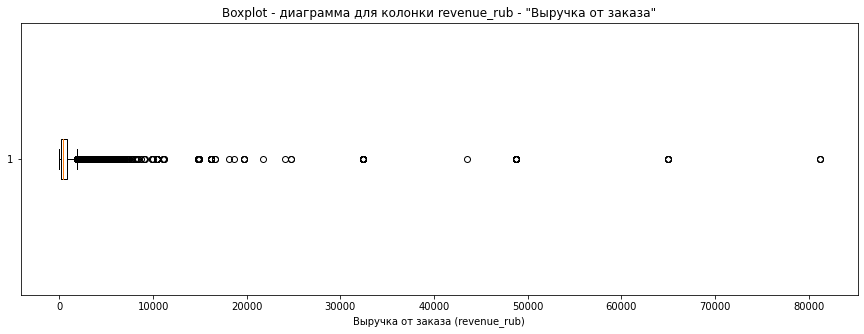

In [57]:
plt.figure(figsize=(15, 5))
plt.boxplot(df['revenue_rub'], vert=False)
plt.title('Boxplot - диаграмма для колонки revenue_rub - "Выручка от заказа"')
plt.xlabel('Выручка от заказа (revenue_rub)')
plt.show()   

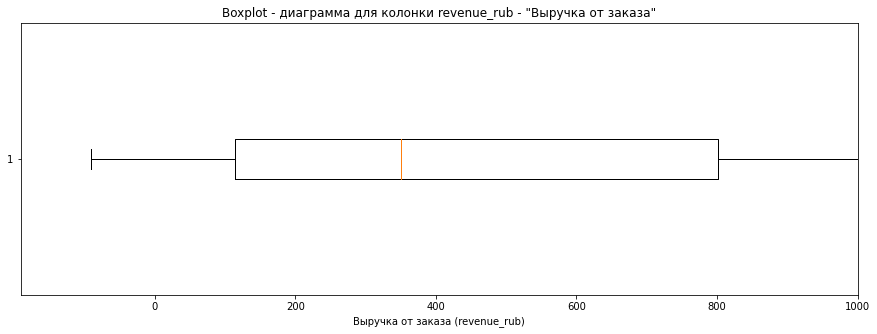

In [58]:
plt.figure(figsize=(15, 5))
plt.boxplot(df['revenue_rub'], vert=False)
plt.title('Boxplot - диаграмма для колонки revenue_rub - "Выручка от заказа"')
plt.xlabel('Выручка от заказа (revenue_rub)')
plt.xlim(df['revenue_rub'].min()-100, 1000)
plt.show()  

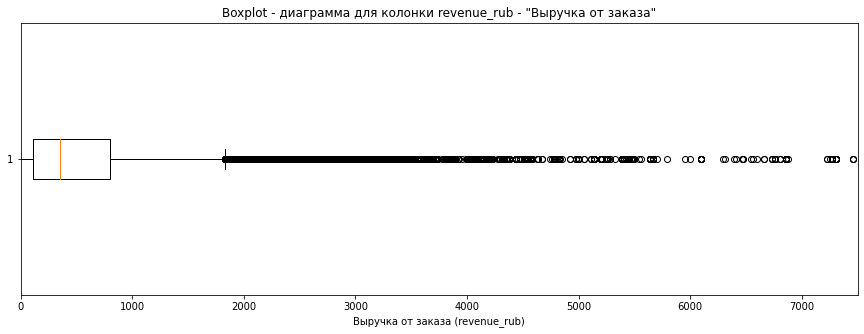

In [59]:
plt.figure(figsize=(15, 5))
plt.boxplot(df['revenue_rub'], vert=False)
plt.title('Boxplot - диаграмма для колонки revenue_rub - "Выручка от заказа"')
plt.xlabel('Выручка от заказа (revenue_rub)')
plt.xlim(0, 7500)
plt.show()  

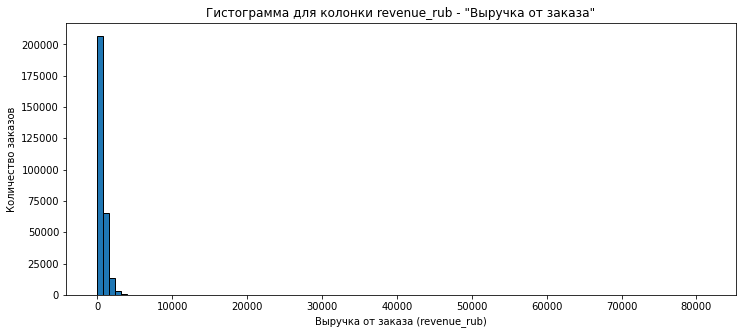

In [60]:
plt.figure(figsize=(12, 5))
plt.hist(df['revenue_rub'], bins=100, edgecolor='black')
plt.title('Гистограмма для колонки revenue_rub - "Выручка от заказа"')
plt.xlabel('Выручка от заказа (revenue_rub)')
plt.ylabel('Количество заказов')
plt.show()

Сохраним значение контрольного показателя - количества строк в датасете

In [61]:
count_before_transforming = df.shape[0]

В колонке `revenue_rub` удалим данные с выручкой менее или равной нулю

In [62]:
df = df[df['revenue_rub'] > 0]

In [63]:
df['revenue_rub'].describe(percentiles=[0.01, 0.05, 0.25, 0.5, 0.75, 0.95, 0.97, 0.99, 0.995, 0.999])

count    284704.000000
mean        567.102257
std         880.828882
min           0.020000
1%            8.160000
5%           23.891500
25%         124.730000
50%         364.280000
75%         811.610000
95%        1645.200000
97%        1952.957600
99%        2628.420000
99.5%      3164.690000
99.9%      5140.780000
max       81174.540000
Name: revenue_rub, dtype: float64

Удалим из датасета записи по 99.9 перецентилю по колонке `tickets_count`

In [64]:
tickets_count_999 = df['tickets_count'].quantile(0.999)
df = df[(df['tickets_count'] < tickets_count_999)]

In [65]:
df['tickets_count'].describe(percentiles=[0.01, 0.05, 0.25, 0.5, 0.75, 0.95, 0.97, 0.999])

count    280264.000000
mean          2.704357
std           1.081329
min           1.000000
1%            1.000000
5%            1.000000
25%           2.000000
50%           3.000000
75%           3.000000
95%           4.000000
97%           5.000000
99.9%         5.000000
max           5.000000
Name: tickets_count, dtype: float64

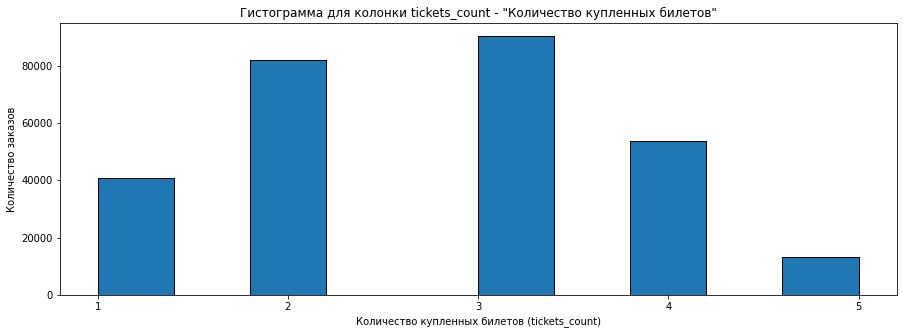

In [66]:
plt.figure(figsize=(15, 5))
plt.hist(df['tickets_count'], bins=10, edgecolor='black')
plt.title('Гистограмма для колонки tickets_count - "Количество купленных билетов"')
plt.xticks(range(1, 6, 1))
plt.xlabel('Количество купленных билетов (tickets_count)')
plt.ylabel('Количество заказов')
plt.show()

Удалим из датасета записи по 99.5 перецентилю по колонке `revenue_rub`

In [67]:
revenue_rub_995 = df['revenue_rub'].quantile(0.995)
df = df[(df['revenue_rub'] < revenue_rub_995)]

In [68]:
df['revenue_rub'].describe(percentiles=[0.01, 0.05, 0.25, 0.5, 0.75, 0.95, 0.97, 0.99, 0.995, 0.999])

count    278858.000000
mean        532.509970
std         524.223943
min           0.020000
1%            8.080000
5%           23.350000
25%         121.980000
50%         357.920000
75%         798.870000
95%        1577.800000
97%        1826.720000
99%        2290.810000
99.5%      2594.440000
99.9%      2843.430000
max        3044.530000
Name: revenue_rub, dtype: float64

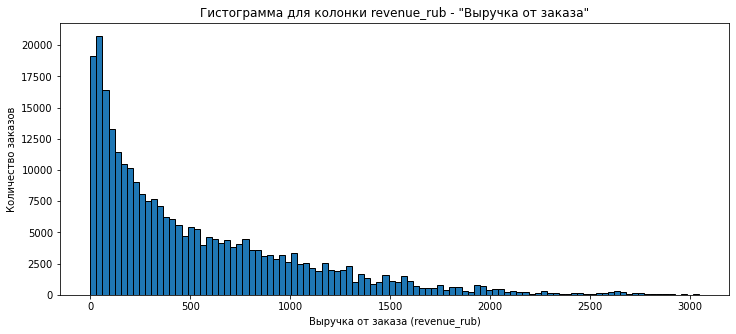

In [69]:
plt.figure(figsize=(12, 5))
plt.hist(df['revenue_rub'], bins=100, edgecolor='black')
plt.title('Гистограмма для колонки revenue_rub - "Выручка от заказа"')
plt.xlabel('Выручка от заказа (revenue_rub)')
plt.ylabel('Количество заказов')
plt.show()

Удалим дубликаты по колонкам `user_id`, `order_ts`, `revenue_rub`, `event_id`

In [70]:
df = df.drop_duplicates(subset=['user_id', 'order_ts', 'revenue_rub', 'event_id'], keep='first')

Проверим количество удаленных записей датасета:

In [71]:
count_del = count_before_transforming - df.shape[0]
print(f"Количество удалённых строк: {count_del}")
prc_del = (count_del / count_before_transforming) * 100
print(f"Процент удалённых строк: {prc_del:.2f}%")

Количество удалённых строк: 11794
Процент удалённых строк: 4.06%


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 278817 entries, 0 to 290610
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   user_id                278817 non-null  object        
 1   device_type_canonical  278817 non-null  object        
 2   order_id               278817 non-null  int32         
 3   order_dt               278817 non-null  datetime64[ns]
 4   order_ts               278817 non-null  datetime64[ns]
 5   currency_code          278817 non-null  object        
 6   revenue                278817 non-null  float64       
 7   tickets_count          278817 non-null  uint8         
 8   days_since_prev        257662 non-null  Int32         
 9   event_id               278817 non-null  int32         
 10  service_name           278817 non-null  object        
 11  event_type_main        278817 non-null  object        
 12  region_name            278817 non-null  obje

Итоги шага 2 проекта:

1. **Объединенили основной датафрейм с датафреймом с курсами казахского тенге**

2. **Создали новый столбец `revenue_rub`** с выручкой в рублях, приведенной для ранее указанной выручке в казахских тенге по курсу на дату записи.

3. **Округлили значения числовых столбцов** `curs`, `revenue`, `revenue_rub` до 2 знаков после запятой.

4. **Оптимизировали типы данных в столбцах** (Обоснование принятой стратегии см. в выводах шага 1 проекта): 
   - `days_since_prev`к тиипу `Int32` (значения всегда целые, приведенный тип данных поддерживает NaN).
   - `order_id`, `event_id`к типу `int32`.
   - `tickets_count` к типу `uint8` (беззнаковый целый тип, т к соответствует данным столбца).
   - `revenue`, `revenue_rub`, `curs` к типу `float64` для сохранения точности.


5. **Удалили лишние столбцы, полученные при объединении датасетов**

6. **В колонке `revenue_rub` удалили отрицательные и нулевые значения для выравнивания данных для анализа.** Обоснование принятой стратегии см. в выводах шага 1 проекта.

7. **В колонках `tickets_count` (по 0.999 перцентилю) и `revenue_rub` (по 0.95 перцентилю) удалили записи с выбросами для выравнивания данных для анализа.** Обоснование принятой стратегии см. в выводах шага 1 проекта (для колонки `revenue_rub` на шаге 2 проведена проверка применимости стратегии для сконструированного признака).

8. **Удалили дубликаты по колонкам `user_id`, `order_ts`, `revenue_rub`, `event_id`** Обоснование принятой стратегии см. в выводах шага 1 проекта.

**Итоги очистки датасета от дубликатов, аномалий и выбросов:**
* Количество удалённых строк: **11794**
* Процент удалённых строк: **4.06%**
* Количество строк до очистки: **290611**
* Количество строк после очистки: **278817**

---

### 3. Создание профиля пользователя

Построим агрегированные признаки, описывающие поведение и профиль каждого пользователя для отдела маркетинга, который планирует создать модель для прогнозирования возврата пользователей.

Перед тем, как строить профиль, отсортируем данные по времени совершения заказа.

Для каждого пользователя найдем:

- дату первого и последнего заказа;
- устройство, с которого был сделан первый заказ;
- регион, в котором был сделан первый заказ;
- билетного партнёра, к которому обращались при первом заказе;
- жанр первого посещённого мероприятия (используем поле `event_type_main`);
- общее количество заказов;
- средняя выручка с одного заказа в рублях;
- среднее количество билетов в заказе;
- среднее время между заказами.

Добавим два бинарных признака:

- `is_two` — совершил ли пользователь 2 и более заказа;
- `is_five` — совершил ли пользователь 5 и более заказов.

Перед построением профиля отсортируем данные по времени совершения заказа

In [73]:
df = df.sort_values(['user_id', 'order_dt'])

Создадим сводную таблицу профиля пользователя

In [74]:
user_profile = df.groupby('user_id').agg(
    first_order_dt=('order_dt', 'first'),
    last_order_dt=('order_dt', 'last'),
    first_device=('device_type_canonical', 'first'),
    first_region=('region_name', 'first'),
    first_service=('service_name', 'first'),
    first_event_type=('event_type_main', 'first'),
    total_orders=('order_id', 'count'),
    avg_revenue_rub=('revenue_rub', 'mean'),
    avg_tickets=('tickets_count', 'mean')
).reset_index()

Сконструируем признак количества дней между заказами пользователя

In [75]:
df['days_between_orders'] = df.groupby('user_id')['order_dt'].diff().dt.days

Найдем среднее значение по сконструированному признаку количества дней между заказами

In [76]:
average_days = df.groupby('user_id')['days_between_orders'].mean()

Добавим среднее значение количества дней между заказами к профилю пользователя

In [77]:
user_profile = user_profile.merge(average_days, on='user_id', how='left')

Добавим в профиль пользователя сконструированный признак `is_two` — совершил ли пользователь 2 и более заказа  

In [78]:
user_profile['is_two'] = (user_profile['total_orders'] >= 2).astype('uint8')

Добавим в профиль пользователя сконструированный признак `is_five` — совершил ли пользователь 5 и более заказов

In [79]:
user_profile['is_five'] = (user_profile['total_orders'] >= 5).astype('uint8')

Посмотрим на данные в профиле пользователя

In [80]:
user_profile.head(10)

,user_id,first_order_dt,last_order_dt,first_device,first_region,first_service,first_event_type,total_orders,avg_revenue_rub,avg_tickets,days_between_orders,is_two,is_five
0,0002849b70a3ce2,2024-08-20,2024-08-20,mobile,Каменевский регион,Край билетов,театр,1,1521.940000,4.000000,NaN,0,0
1,0005ca5e93f2cf4,2024-07-23,2024-10-06,mobile,Каменевский регион,Мой билет,выставки,2,774.010000,3.000000,75.000000,1,0
2,000898990054619,2024-07-13,2024-10-23,mobile,Североярская область,Лови билет!,другое,3,767.213333,2.666667,51.000000,1,0
3,00096d1f542ab2b,2024-08-15,2024-08-15,desktop,Каменевский регион,Край билетов,театр,1,917.830000,4.000000,NaN,0,0
4,000a55a418c128c,2024-09-29,2024-10-15,mobile,Поленовский край,Лучшие билеты,театр,2,61.310000,1.500000,16.000000,1,0
5,000cf0659a9f40f,2024-06-20,2024-06-21,mobile,Широковская область,Лови билет!,концерты,13,1175.808462,3.307692,0.083333,1,1
6,00147c9209d45d3,2024-06-25,2024-06-25,mobile,Каменевский регион,Облачко,концерты,2,352.945000,1.500000,0.000000,1,0
7,00199a573901564,2024-06-17,2024-06-17,mobile,Каменевский регион,Билеты без проблем,концерты,1,588.120000,4.000000,NaN,0,0
8,001e7037d013f0f,2024-07-04,2024-09-29,mobile,Златопольский округ,Мой билет,другое,3,326.623333,1.333333,43.500000,1,0
9,0020c5654c92ec1,2024-07-02,2024-07-02,mobile,Каменевский регион,Билеты без проблем,концерты,2,193.420000,2.000000,0.000000,1,0


In [81]:
user_profile.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21588 entries, 0 to 21587
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   user_id              21588 non-null  object        
 1   first_order_dt       21588 non-null  datetime64[ns]
 2   last_order_dt        21588 non-null  datetime64[ns]
 3   first_device         21588 non-null  object        
 4   first_region         21588 non-null  object        
 5   first_service        21588 non-null  object        
 6   first_event_type     21588 non-null  object        
 7   total_orders         21588 non-null  int64         
 8   avg_revenue_rub      21588 non-null  float64       
 9   avg_tickets          21588 non-null  float64       
 10  days_between_orders  13309 non-null  float64       
 11  is_two               21588 non-null  uint8         
 12  is_five              21588 non-null  uint8         
dtypes: datetime64[ns](2), float64(3

Оптимизируем модель хранения для профиля пользователя:

- `total_orders` - приведем к беззнаковому целому `uint16` ориентируясь на суть данных,
- `avg_revenue_rub` - приведем к целому `Int64` (копейки можно отбросить для анализа),
- `avg_tickets` - округлим до 1 знака, т. к. большая точность избыточна для анализа,
- `days_between_orders` - округлим до 1 знака, т. к. большая точность избыточна для анализа.

In [82]:
user_profile['total_orders'] = user_profile['total_orders'].astype('uint16')
user_profile['avg_revenue_rub'] = pd.to_numeric(user_profile['avg_revenue_rub'], errors='coerce').round().astype('Int64')
for col in ['avg_tickets', 'days_between_orders']:
    user_profile[col] = user_profile[col].round(1).astype('float64')

Посмотрим на получившийся в результате датасет:

In [83]:
user_profile.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21588 entries, 0 to 21587
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   user_id              21588 non-null  object        
 1   first_order_dt       21588 non-null  datetime64[ns]
 2   last_order_dt        21588 non-null  datetime64[ns]
 3   first_device         21588 non-null  object        
 4   first_region         21588 non-null  object        
 5   first_service        21588 non-null  object        
 6   first_event_type     21588 non-null  object        
 7   total_orders         21588 non-null  uint16        
 8   avg_revenue_rub      21588 non-null  Int64         
 9   avg_tickets          21588 non-null  float64       
 10  days_between_orders  13309 non-null  float64       
 11  is_two               21588 non-null  uint8         
 12  is_five              21588 non-null  uint8         
dtypes: Int64(1), datetime64[ns](2),

In [84]:
user_profile.head(10)

,user_id,first_order_dt,last_order_dt,first_device,first_region,first_service,first_event_type,total_orders,avg_revenue_rub,avg_tickets,days_between_orders,is_two,is_five
0,0002849b70a3ce2,2024-08-20,2024-08-20,mobile,Каменевский регион,Край билетов,театр,1,1522,4.0,NaN,0,0
1,0005ca5e93f2cf4,2024-07-23,2024-10-06,mobile,Каменевский регион,Мой билет,выставки,2,774,3.0,75.0,1,0
2,000898990054619,2024-07-13,2024-10-23,mobile,Североярская область,Лови билет!,другое,3,767,2.7,51.0,1,0
3,00096d1f542ab2b,2024-08-15,2024-08-15,desktop,Каменевский регион,Край билетов,театр,1,918,4.0,NaN,0,0
4,000a55a418c128c,2024-09-29,2024-10-15,mobile,Поленовский край,Лучшие билеты,театр,2,61,1.5,16.0,1,0
5,000cf0659a9f40f,2024-06-20,2024-06-21,mobile,Широковская область,Лови билет!,концерты,13,1176,3.3,0.1,1,1
6,00147c9209d45d3,2024-06-25,2024-06-25,mobile,Каменевский регион,Облачко,концерты,2,353,1.5,0.0,1,0
7,00199a573901564,2024-06-17,2024-06-17,mobile,Каменевский регион,Билеты без проблем,концерты,1,588,4.0,NaN,0,0
8,001e7037d013f0f,2024-07-04,2024-09-29,mobile,Златопольский округ,Мой билет,другое,3,327,1.3,43.5,1,0
9,0020c5654c92ec1,2024-07-02,2024-07-02,mobile,Каменевский регион,Билеты без проблем,концерты,2,193,2.0,0.0,1,0


Прежде чем проводить исследовательский анализ данных и делать выводы, важно понять, с какими данными мы работаем: насколько они репрезентативны и нет ли в них аномалий.

Используя данные о профилях пользователей, рассчитаем:

- общее число пользователей в выборке;
- среднюю выручку с одного заказа;
- долю пользователей, совершивших 2 и более заказа;
- долю пользователей, совершивших 5 и более заказов.

Также изучим статистические показатели:

- по общему числу заказов;
- по среднему числу билетов в заказе;
- по среднему количеству дней между покупками.

По результатам оценим данные: достаточно ли их по объёму, есть ли аномальные значения в данных о количестве заказов и среднем количестве билетов?

Если вы найдём аномальные значения, опишем их и примем обоснованное решение о том, как с ними поступить:

- Оставить и учитывать их при анализе?
- Отфильтровать данные по какому-то значению, например, по 95-му или 99-му перцентилю?

Если будем проведить фильтрацию, то вычислим объём отфильтрованных данных и выведем статистические показатели по обновлённому датасету.

In [85]:
# Общее число пользователей
total_users = len(user_profile)

# Средняя выручка с одного заказа
avg_revenue_per_order = user_profile['avg_revenue_rub'].mean()

# Доля пользователей с 2 и более заказами
is_two_or_more = (user_profile['is_two'] == 1).mean()

# Доля пользователей с 5 и более заказами
is_five_or_more = (user_profile['is_five'] == 1).mean()

# Выводим результаты
print(f"Общее число пользователей: {total_users}")
print(f"Средняя выручка с одного заказа: {avg_revenue_per_order:.2f} руб.")
print(f"Доля пользователей с 2 и более заказами: {is_two_or_more:.2%}")
print(f"Доля пользователей с 5 и более заказами: {is_five_or_more:.2%}")

Общее число пользователей: 21588
Средняя выручка с одного заказа: 554.74 руб.
Доля пользователей с 2 и более заказами: 61.65%
Доля пользователей с 5 и более заказами: 28.83%


In [86]:
user_profile['total_orders'].describe(percentiles=[0.01, 0.05, 0.25, 0.5, 0.75, 0.95, 0.97, 0.99, 0.995, 0.999])

count    21588.000000
mean        12.915370
std        118.481781
min          1.000000
1%           1.000000
5%           1.000000
25%          1.000000
50%          2.000000
75%          5.000000
95%         31.000000
97%         53.000000
99%        149.130000
99.5%      317.520000
99.9%     1434.543000
max       9816.000000
Name: total_orders, dtype: float64

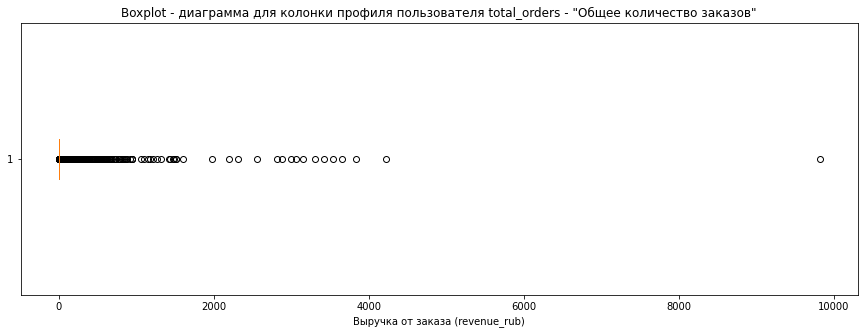

In [87]:
plt.figure(figsize=(15, 5))
plt.boxplot(user_profile['total_orders'], vert=False)
plt.title('Boxplot - диаграмма для колонки профиля пользователя total_orders - "Общее количество заказов"')
plt.xlabel('Выручка от заказа (revenue_rub)')
plt.show() 

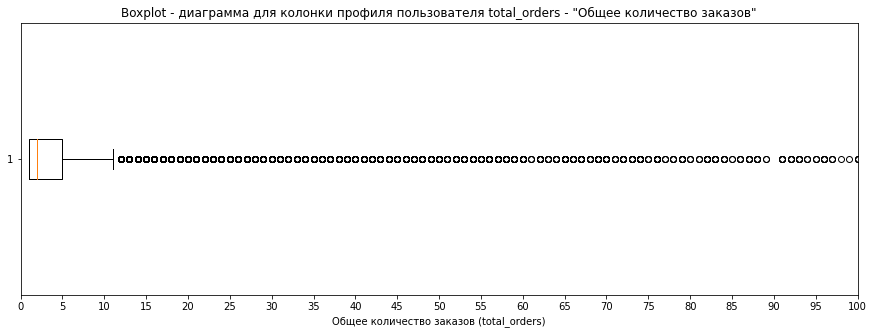

In [88]:
plt.figure(figsize=(15, 5))
plt.boxplot(user_profile['total_orders'], vert=False)
plt.title('Boxplot - диаграмма для колонки профиля пользователя total_orders - "Общее количество заказов"')
plt.xlim(0, 100)
plt.xticks(range(0, 101, 5))
plt.xlabel('Общее количество заказов (total_orders)')
plt.show() 

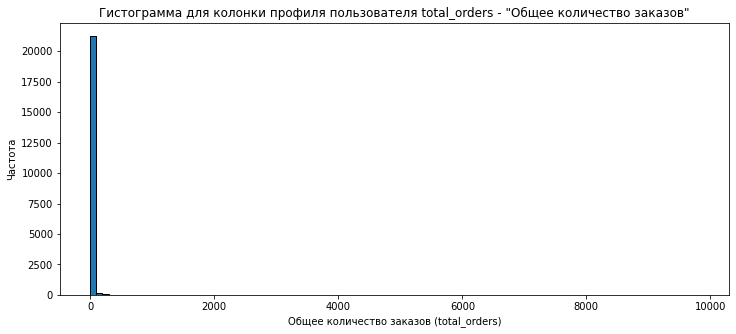

In [89]:
plt.figure(figsize=(12, 5))
plt.hist(user_profile['total_orders'], bins=100, edgecolor='black')
plt.title('Гистограмма для колонки профиля пользователя total_orders - "Общее количество заказов"')
plt.xlabel('Общее количество заказов (total_orders)')
plt.ylabel('Частота')
plt.show()

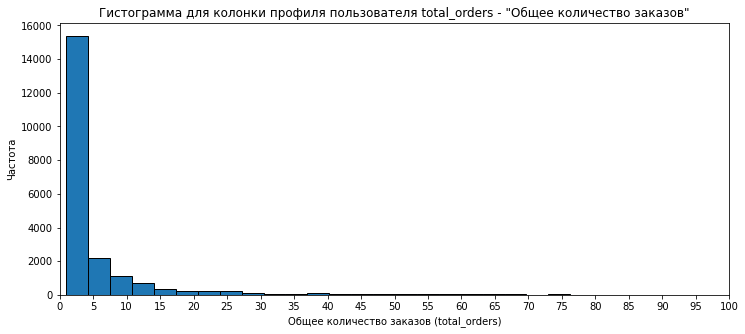

In [90]:
plt.figure(figsize=(12, 5))
plt.hist(user_profile['total_orders'], bins=3000, edgecolor='black')
plt.title('Гистограмма для колонки профиля пользователя total_orders - "Общее количество заказов"')
plt.xlim(0, 100)
plt.xticks(range(0, 101, 5))
plt.xlabel('Общее количество заказов (total_orders)')
plt.ylabel('Частота')
plt.show()

In [91]:
user_profile['total_orders'].value_counts().sort_index()

1       8279
2       3554
3       2146
4       1385
5        960
        ... 
3542       1
3661       1
3842       1
4230       1
9816       1
Name: total_orders, Length: 329, dtype: int64

- Объем данных по колонке `total_orders` достаточен для анализа.
- Исходя из картины распределения данных колонки `total_orders` (плотность популяции в области выбросов) будем фильтровать выбросы по 99 перцентилю (правее единичные выбросы, которыми можно пожертвовать без искажения картины)

In [92]:
user_profile['avg_tickets'].describe(percentiles=[0.01, 0.05, 0.25, 0.5, 0.75, 0.95, 0.97, 0.99, 0.995, 0.999])

count    21588.000000
mean         2.703196
std          0.854780
min          1.000000
1%           1.000000
5%           1.000000
25%          2.000000
50%          2.700000
75%          3.000000
95%          4.000000
97%          4.300000
99%          5.000000
99.5%        5.000000
99.9%        5.000000
max          5.000000
Name: avg_tickets, dtype: float64

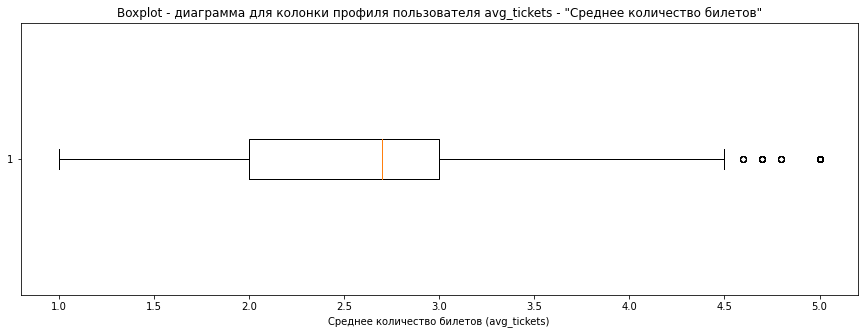

In [93]:
plt.figure(figsize=(15, 5))
plt.boxplot(user_profile['avg_tickets'], vert=False)
plt.title('Boxplot - диаграмма для колонки профиля пользователя avg_tickets - "Среднее количество билетов"')
plt.xlabel('Среднее количество билетов (avg_tickets)')
plt.show() 

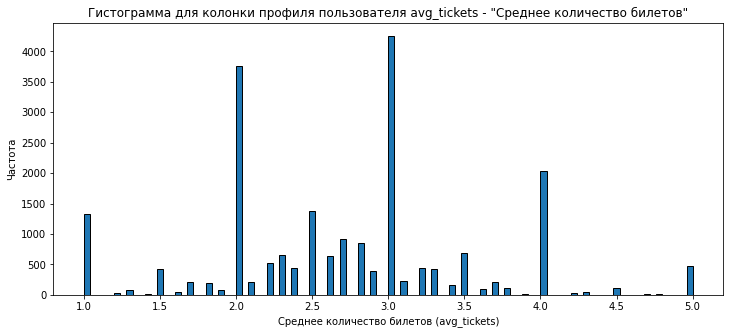

In [94]:
plt.figure(figsize=(12, 5))
plt.hist(user_profile['avg_tickets'], bins=100, edgecolor='black')
plt.title('Гистограмма для колонки профиля пользователя avg_tickets - "Среднее количество билетов"')
plt.xlabel('Среднее количество билетов (avg_tickets)')
plt.ylabel('Частота')
plt.show()

- Объем данных по колонке `avg_tickets` достаточен для анализа. 
- В принципе выбросы по клонке `avg_tickets` практически отсутствуют (ранее уже фильтровали по количеству билетов), так что чистить не требуется.

In [95]:
user_profile['days_between_orders'].describe(percentiles=[0.01, 0.05, 0.25, 0.5, 0.75, 0.95, 0.97, 0.99, 0.995, 0.999])

count    13309.000000
mean        15.916327
std         22.306119
min          0.000000
1%           0.000000
5%           0.000000
25%          1.000000
50%          8.200000
75%         20.600000
95%         61.000000
97%         78.000000
99%        112.000000
99.5%      126.000000
99.9%      140.384000
max        148.000000
Name: days_between_orders, dtype: float64

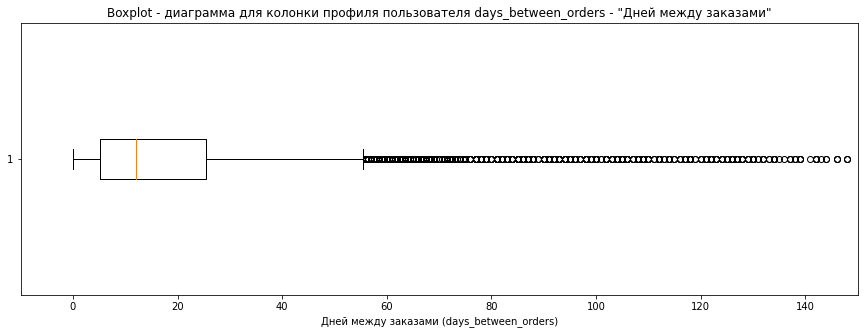

In [96]:
plt.figure(figsize=(15, 5))
plt.boxplot(user_profile[(user_profile['days_between_orders'] > 0)]['days_between_orders'], vert=False)
plt.title('Boxplot - диаграмма для колонки профиля пользователя days_between_orders - "Дней между заказами"')
plt.xlim(-10, 150)
plt.xlabel('Дней между заказами (days_between_orders)')
plt.show()

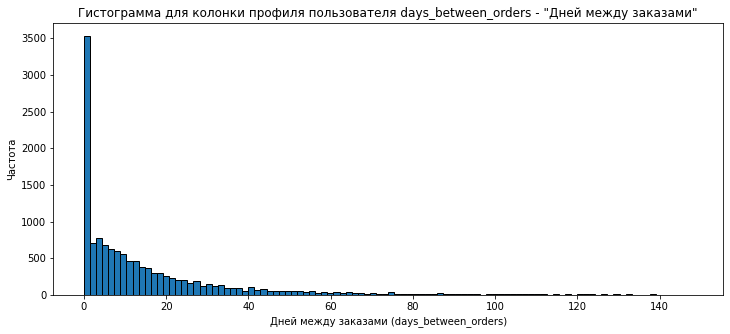

In [97]:
plt.figure(figsize=(12, 5))
plt.hist(user_profile['days_between_orders'], bins=100, edgecolor='black')
plt.title('Гистограмма для колонки профиля пользователя days_between_orders - "Дней между заказами"')
plt.xlabel('Дней между заказами (days_between_orders)')
plt.ylabel('Частота')
plt.show()

- Объем данных по колонке `days_between_orders` достаточен для анализа.
- По колонке `days_between_orders` чистку проводить не требуется, так как правый длинный хвост распределения - это нормальное явление (пользователи, редко своершающие покупки), которое не стоит исключать из анализа для сохранения полноты картины.

Отфильтруем `total_orders` по перцентилю 99%

In [98]:
# Замеряем количество строк в user_profile до фильтрации
user_profile_count_before = user_profile.shape[0]

# Фильтруем total_orders по 99 перцентилю
total_orders_99 = user_profile['total_orders'].quantile(0.99)
user_profile = user_profile[(user_profile['total_orders'] <= total_orders_99)]

# Замеряем количество строк в user_profile после фильтрации 
user_profile_count_after = user_profile.shape[0]

# Подсчитываем сколько строк было удалено и в процентах
rows_removed = user_profile_count_before - user_profile_count_after
print(f"Количество удалённых строк: {rows_removed}")
percentage_removed = (rows_removed / user_profile_count_before) * 100
print(f"Процент удалённых строк: {percentage_removed:.2f}%")

Количество удалённых строк: 216
Процент удалённых строк: 1.00%


Проверим изменения в профиле пользователей после фильтрации `total_orders`

In [99]:
# Общее число пользователей
total_users = len(user_profile)

# Средняя выручка с одного заказа
avg_revenue_per_order = user_profile['avg_revenue_rub'].mean()

# Доля пользователей с 2 и более заказами
is_two_or_more = (user_profile['is_two'] == 1).mean()

# Доля пользователей с 5 и более заказами
is_five_or_more = (user_profile['is_five'] == 1).mean()

# Выводим результаты
print(f"Общее число пользователей: {total_users}")
print(f"Средняя выручка с одного заказа: {avg_revenue_per_order:.2f} руб.")
print(f"Доля пользователей с 2 и более заказами: {is_two_or_more:.2%}")
print(f"Доля пользователей с 5 и более заказами: {is_five_or_more:.2%}")

Общее число пользователей: 21372
Средняя выручка с одного заказа: 554.99 руб.
Доля пользователей с 2 и более заказами: 61.26%
Доля пользователей с 5 и более заказами: 28.11%


В результате фильтрации по колонке `total_orders` удалено 216 строк (1%). Изменение средней выручки не значительно.

Промежуточные выводы по итогам шага 3:
1. Построены агрегированные признаки, описывающие поведение и профиль каждого пользователя.
2. Используя данные о профилях пользователей, рассчитали:

- общее число пользователей в выборке;
- среднюю выручку с одного заказа;
- долю пользователей, совершивших 2 и более заказа;
- долю пользователей, совершивших 5 и более заказов.

3. Также изучили статистические показатели:

- по общему числу заказов;
- по среднему числу билетов в заказе;
- по среднему количеству дней между покупками.

3. По результатам оценили данные: 
 - объем данных достаточен для анализа,
 - в колонке `total_orders` выявлены выбросы, которые были вычищены по 99 перцентилю исходя из оценки плотности популяции наблюдений в зоне предполагаемых выбросов (правее 99 перцентиля единичные выбросы).
 
4. Проведен анализ изменений датасета по итогам фильтрации по колонке `total_orders`: в результате фильтрации по колонке `total_orders` удалено 216 строк (1%), изменение средней выручки не значительно.

---

### 4. Исследовательский анализ данных

Следующий этап — исследование признаков, влияющих на возврат пользователей, то есть на совершение повторного заказа. Для этого используем профили пользователей.



#### 4.1. Исследование признаков первого заказа и их связи с возвращением на платформу

Исследуем признаки, описывающие первый заказ пользователя, и выясним, влияют ли они на вероятность возвращения пользователя.

**Шаг 4.1.1 Изучим распределение пользователей по признакам.**

- Сгруппируем пользователей:
    - по типу их первого мероприятия;
    - по типу устройства, с которого совершена первая покупка;
    - по региону проведения мероприятия из первого заказа;
    - по билетному оператору, продавшему билеты на первый заказ.
- Подсчитаем общее количество пользователей в каждом сегменте и их долю в разрезе каждого признака. 
- Ответим на вопрос: равномерно ли распределены пользователи по сегментам или есть выраженные «точки входа» — сегменты с наибольшим числом пользователей?

Напишем функцию для вывода информации по сементам

In [100]:
def seg_info(df, column):
        seg = (df.groupby(column).agg(users_count=('user_id', 'nunique')) .reset_index().sort_values('users_count', ascending=False))
        seg['users_share'] = (seg['users_count'] / seg['users_count'].sum() * 100)
        seg['users_share'] = seg['users_share'].round(2)
        return seg

Сгруппируем пользователей по типу их первого мероприятия

In [101]:
seg_info(user_profile, 'first_event_type')

,first_event_type,users_count,users_share
2,концерты,9610,44.97
1,другое,5135,24.03
5,театр,4256,19.91
4,стендап,1109,5.19
3,спорт,761,3.56
0,выставки,406,1.90
6,ёлки,95,0.44


Сгруппируем пользователей по типу устройства, с которого совершена первая покупка

In [102]:
seg_info(user_profile, 'first_device')

,first_device,users_count,users_share
1,mobile,17693,82.79
0,desktop,3679,17.21


Сгруппируем пользователей по региону проведения мероприятия из первого заказа

In [103]:
seg_info(user_profile, 'first_region').head(10)

,first_region,users_count,users_share
23,Каменевский регион,6964,32.58
60,Североярская область,3734,17.47
77,Широковская область,1237,5.79
45,Озернинский край,670,3.13
41,Малиновоярский округ,528,2.47
57,Светополянский округ,467,2.19
76,Шанырский регион,466,2.18
74,Травяная область,455,2.13
52,Речиновская область,441,2.06
78,Яблоневская область,407,1.90


Сгруппируем пользователей по билетному оператору, продавшему билеты на первый заказ

In [104]:
seg_info(user_profile, 'first_service').head(10)

,first_service,users_count,users_share
3,Билеты без проблем,4886,22.86
22,Мой билет,3005,14.06
19,Лови билет!,2812,13.16
4,Билеты в руки,2519,11.79
23,Облачко,2195,10.27
7,Весь в билетах,1290,6.04
20,Лучшие билеты,1177,5.51
24,Прачечная,580,2.71
17,Край билетов,466,2.18
12,Дом культуры,345,1.61


Вывод по итогам шага 4.1.1:

- Распределение пользователей по всем признакам **неравномерное**.  
- Есть выраженные **точки входа**:
  - Концерты по типу мероприятия  
  - Мобильные устройства  
  - Каменевский район и Североярская область  
  - Крупные билетные операторы («Билеты без проблем», «Мой билет», «Лови билет!»)  
- Эти сегменты включают наибольшее число пользователей и являются важнейшими для проведения анализа поведения пользователей и выбработки бизнес-стратегий**.

---

**Шаг 4.1.2. Проанализируем возвраты пользователей.**

- Для каждого сегмента вычислим долю пользователей, совершивших два и более заказа.
- Визуализируем результат подходящим графиком. Если сегментов слишком много, то поместим на график только 10 сегментов с наибольшим количеством пользователей. Такое возможно с сегментами по региону и по билетному оператору.
- Ответим на вопросы:
    - Какие сегменты пользователей чаще возвращаются на Яндекс Афишу?
    - Наблюдаются ли успешные «точки входа» — такие сегменты, в которых пользователи чаще совершают повторный заказ, чем в среднем по выборке?

*При интерпретации результатов учем размер сегментов: если в сегменте мало пользователей (например, десятки), то доли могут быть нестабильными и недостоверными, то есть показывать широкую вариацию значений.*

Напишем функцию для вывода информации по сементам с долей пользователей, совершивших два и более заказа. Добавим параметр `sort_by_2ormore` (по умолчанию `True`) применения сортировки по доле пользователей, совершивших два и более заказа. Этот параметр при большом количестве сегментов в выборке, чтоб посмотреть топ-10 как по размеру сегмента (количеству пользователей), так и по доле пользователей, совершивших два и более заказа.

In [105]:
def seg_info_w_ge2(df, column, sort_by_2ormore=True):
        seg = (df.groupby(column).agg(users_count=('user_id', 'nunique')) .reset_index().sort_values('users_count', ascending=False))
        seg['users_share'] = (seg['users_count'] / seg['users_count'].sum() * 100)
        seg['users_share'] = seg['users_share'].round(2)
        seg_ge2 = (df.groupby(column)['is_two'].mean().reset_index())
        seg['users_share_2ormore'] = (seg_ge2['is_two'] * 100)
        seg['users_share_2ormore'] = seg['users_share_2ormore'].round(2)   
        if sort_by_2ormore:
            return seg.sort_values('users_share_2ormore', ascending=False)
        else:
            return seg

Посчитаем средний процент по выборке совершения повтроных заказов:

In [106]:
(user_profile['is_two'].sum()/user_profile.shape[0] * 100).round(2) 

61.26

Сгруппируем пользователей по типу их первого мероприятия

In [107]:
seg_info_w_ge2(user_profile, 'first_event_type')

,first_event_type,users_count,users_share,users_share_2ormore
5,театр,4256,19.91,63.65
0,выставки,406,1.90,63.30
2,концерты,9610,44.97,61.71
4,стендап,1109,5.19,61.14
1,другое,5135,24.03,59.44
3,спорт,761,3.56,54.80
6,ёлки,95,0.44,52.63


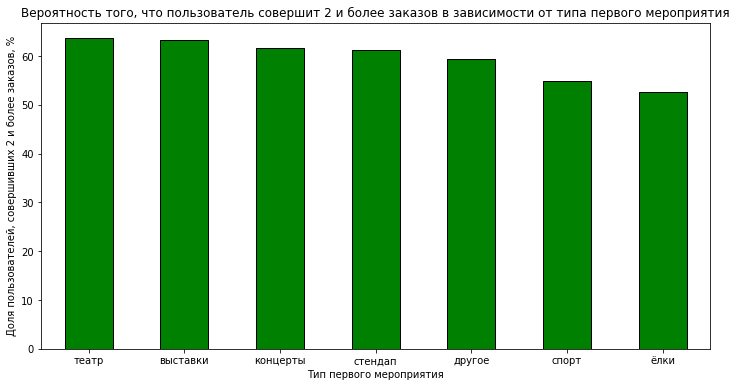

In [108]:
seg_info_w_ge2(user_profile, 'first_event_type').plot(kind='bar',
				title='Вероятность того, что пользователь совершит 2 и более заказов в зависимости от типа первого мероприятия',
                legend=False,
                x='first_event_type', y='users_share_2ormore',
                color='green',
                edgecolor='black',                                      
                xlabel='Тип первого мероприятия',
                ylabel='Доля пользователей, совершивших 2 и более заказов, %',
                rot=0,
                figsize=(12,6))

plt.show()

Сгруппируем пользователей по типу устройства, с которого совершена первая покупка

In [109]:
seg_info_w_ge2(user_profile, 'first_device')

,first_device,users_count,users_share,users_share_2ormore
0,desktop,3679,17.21,63.85
1,mobile,17693,82.79,60.72


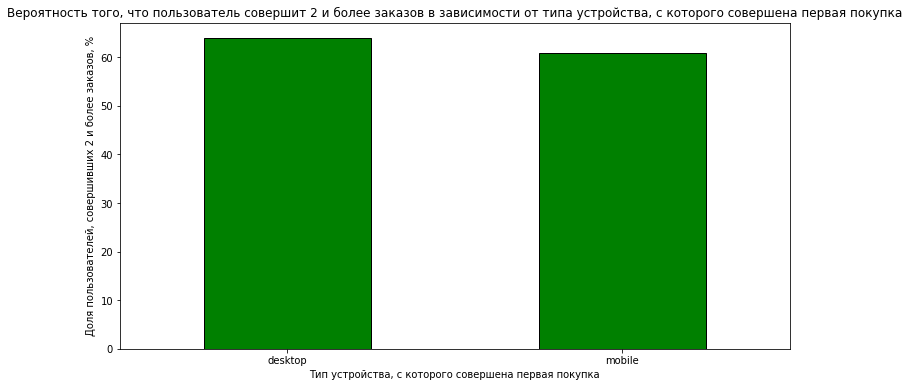

In [110]:
seg_info_w_ge2(user_profile, 'first_device').plot(kind='bar',
				title='Вероятность того, что пользователь совершит 2 и более заказов в зависимости от типа устройства, с которого совершена первая покупка',
                legend=False,
                x='first_device', y='users_share_2ormore',
                color='green',
                edgecolor='black',                                      
                xlabel='Тип устройства, с которого совершена первая покупка',
                ylabel='Доля пользователей, совершивших 2 и более заказов, %',
                rot=0,
                figsize=(12,6))

plt.show()

Сгруппируем пользователей по региону проведения мероприятия из первого заказа (топ-10 по доле совершивших >= 2 заказов и отдельно по размеру сегмента)

In [111]:
seg_info_w_ge2(user_profile, 'first_region').head(10)

,first_region,users_count,users_share,users_share_2ormore
5,Верхозёрский край,1,0.00,100.00
46,Озернопольская область,28,0.13,89.29
51,Радужнопольский край,24,0.11,79.17
12,Горноземский регион,28,0.13,71.43
76,Шанырский регион,466,2.18,70.39
71,Тихолесский край,10,0.05,70.00
36,Лесостепной край,60,0.28,70.00
11,Горицветская область,245,1.15,66.94
33,Лесноярский край,3,0.01,66.67
4,Верховинская область,3,0.01,66.67


In [112]:
seg_info_w_ge2(user_profile, 'first_region', False).head(10)

,first_region,users_count,users_share,users_share_2ormore
23,Каменевский регион,6964,32.58,61.79
60,Североярская область,3734,17.47,63.93
77,Широковская область,1237,5.79,65.00
45,Озернинский край,670,3.13,55.07
41,Малиновоярский округ,528,2.47,55.30
57,Светополянский округ,467,2.19,66.38
76,Шанырский регион,466,2.18,70.39
74,Травяная область,455,2.13,61.10
52,Речиновская область,441,2.06,63.95
78,Яблоневская область,407,1.90,59.95


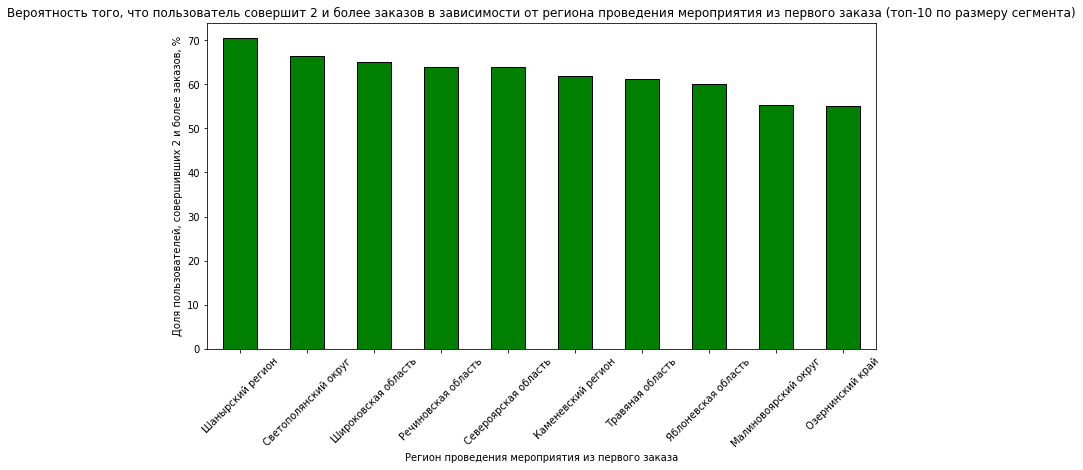

In [113]:
seg_info_w_ge2(user_profile, 'first_region', False).head(10).sort_values('users_share_2ormore', ascending=False).plot(kind='bar',
				title='Вероятность того, что пользователь совершит 2 и более заказов в зависимости от региона проведения мероприятия из первого заказа (топ-10 по размеру сегмента)',
                legend=False,
                x='first_region', y='users_share_2ormore',
                color='green',
                edgecolor='black',                                      
                xlabel='Регион проведения мероприятия из первого заказа',
                ylabel='Доля пользователей, совершивших 2 и более заказов, %',
                rot=45,
                figsize=(12,6))

plt.show()

Сгруппируем пользователей по билетному оператору, продавшему билеты на первый заказ (топ-10 по доле совершивших >= 2 заказов и отдельно по размеру сегмента)

In [114]:
seg_info_w_ge2(user_profile, 'first_service').head(10)

,first_service,users_count,users_share,users_share_2ormore
14,Зе Бест!,1,0.00,100.00
6,Быстрый кассир,59,0.28,84.75
26,Реестр,31,0.15,80.65
0,Crazy ticket!,46,0.22,69.57
8,Восьмёрка,86,0.40,67.44
2,Билет по телефону,6,0.03,66.67
1,Show_ticket,162,0.76,65.43
17,Край билетов,466,2.18,65.24
12,Дом культуры,345,1.61,64.35
21,Мир касс,207,0.97,63.29


In [115]:
seg_info_w_ge2(user_profile, 'first_service', False).head(10)

,first_service,users_count,users_share,users_share_2ormore
3,Билеты без проблем,4886,22.86,59.74
22,Мой билет,3005,14.06,60.67
19,Лови билет!,2812,13.16,61.34
4,Билеты в руки,2519,11.79,62.52
23,Облачко,2195,10.27,61.37
7,Весь в билетах,1290,6.04,62.95
20,Лучшие билеты,1177,5.51,61.85
24,Прачечная,580,2.71,62.24
17,Край билетов,466,2.18,65.24
12,Дом культуры,345,1.61,64.35


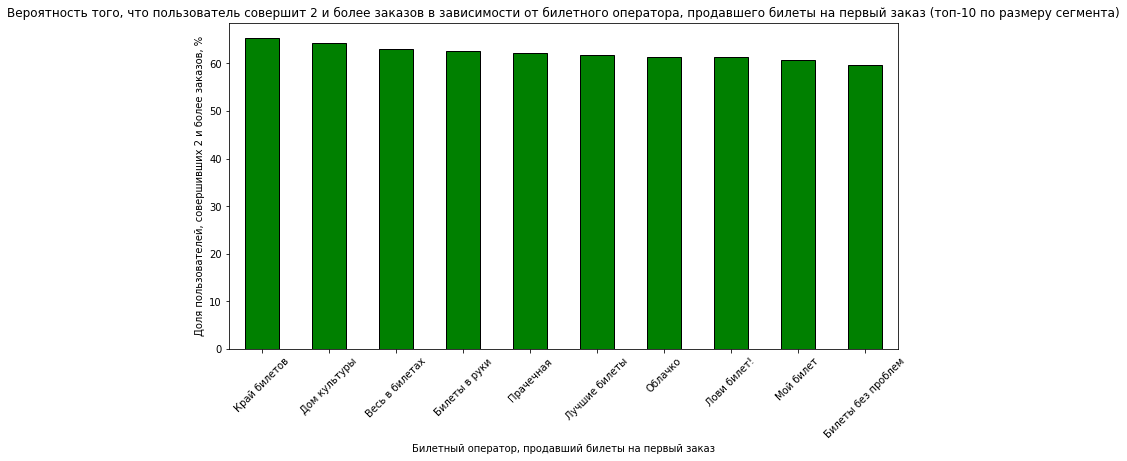

In [116]:
seg_info_w_ge2(user_profile, 'first_service', False).head(10).sort_values('users_share_2ormore', ascending=False).plot(kind='bar',
				title='Вероятность того, что пользователь совершит 2 и более заказов в зависимости от билетного оператора, продавшего билеты на первый заказ (топ-10 по размеру сегмента)',
                legend=False,
                x='first_service', y='users_share_2ormore',
                color='green',
                edgecolor='black',                                      
                xlabel='Билетный оператор, продавший билеты на первый заказ',
                ylabel='Доля пользователей, совершивших 2 и более заказов, %',
                rot=45,
                figsize=(12,6))

plt.show()

Вывод по итогам шага 4.1.2:
Проведен анализ доли пользователей, совершивших 2 или более заказа, по основным сегментам (с визуализацией результатов): 
- по типу их первого мероприятия:
  - Наибольшая доля повторных заказов пользователей в сегментах `театр`, `выставки`, `концерты`, `стендап`, `другое`, при этом достаточным для определения устойчивой и достоверной доли размером сегмента обладают сегменты `театр`, `концерты`, `другое`. Также сегменты `театр`, `концерты` являются успешными «точками входа» — сегментами, в которых пользователи чаще совершают повторный заказ (63.65% и 61.71% соответственно), чем в среднем по выборке (61.26%).
- по типу устройства, с которого совершена первая покупка:
  - Наибольшая доля повторных заказов пользователей в сегменте `desktop`. По обоим сегментам размер достаточный для определения устойчивой и достоверной доли. Сегмент `desktop` является успешной «точкой входа» — сегментом, в котором пользователи чаще совершают повторный заказ (63.85%), чем в среднем по выборке (61.26%).
- по региону проведения мероприятия из первого заказа:
  - Наибольшая доля повторных заказов пользователей наблюдается в сегментах (регионах) с малым количеством пользователей - доля неустойчива и недостоверна, среди сегментов с большим количеством пользователей стоит выделить `Каменевский регион`, `Североярская область`, оба этих сегмента также являются успешными «точками входа» — сегментами, в которых пользователи чаще совершают повторный заказ (61.79% и 63.93% соответственно), чем в среднем по выборке (61.26%).
- по билетному оператору, продавшему билеты на первый заказ:
  - Наибольшая доля повторных заказов пользователей наблюдается в сегментах (операторах) с малым количеством пользователей - доля неустойчива и недостоверна, среди сегментов с большим количеством пользователей стоит выделить `Билеты без проблем`, `Мой билет`, `Лови билет!`, `Билеты в руки`, `Облачко`. Из этих сегментов `Лови билет!`, `Билеты в руки`, `Облачко` являются успешными «точками входа» — сегментами, в которых пользователи чаще совершают повторный заказ (61.34%, 62.52% и 61.37% соответственно), чем в среднем по выборке (61.26%).

---

**Шаг 4.1.3. Опираясь на выводы из задач выше, проверим продуктовые гипотезы.**

- **Гипотеза 1.** Тип мероприятия влияет на вероятность возврата на Яндекс Афишу: пользователи, которые совершили первый заказ на спортивные мероприятия, совершают повторный заказ чаще, чем пользователи, оформившие свой первый заказ на концерты.
- **Гипотеза 2.** В регионах, где больше всего пользователей посещают мероприятия, выше доля повторных заказов, чем в менее активных регионах.

Гипотеза 1:

Сравним процент повторных заказов в сегментах `концерты` и `спорт`:
- концерты:	61.71% повторных заказов
- спорт:	54.80% повторных заказов

**Гипотеза не подтверждается.**

Гипотеза 2:

Сравним ТОП-3 регионов по количеству пользователей и по проценту повторных заказов:

- Каменевский регион:     6964 пользователей,	61.79% повторных заказов
- Североярская область:	3734 пользователей,	63.93% повторных заказов
- Широковская область:	1237 пользователей,	65.00% повторных заказов


- Верхозёрский край:	    1  пользователей,	100.00% повторных заказов
- Озернопольская область:	28 пользователей,	89.29% повторных заказов
- Радужнопольский край:	24 пользователей,	79.17% повторных заказов

**Гипотеза не подтверждается.** При этом следует учитывать, что для сегментов (регионов) с малым количеством пользователей нестабильна и не достоверна. Для регионов с большим количеством пользователей не прослеживается положительной корреляции между количеством пользователей и процентом повторных заказов, т. е. нет строгой прямой зависимости от размера выборки сегмента.

---

#### 4.2. Исследование поведения пользователей через показатели выручки и состава заказа

Изучим количественные характеристики заказов пользователей, чтобы узнать среднюю выручку сервиса с заказа и количество билетов, которое пользователи обычно покупают.

Эти метрики важны не только для оценки выручки, но и для оценки вовлечённости пользователей. Возможно, пользователи с более крупными и дорогими заказами более заинтересованы в сервисе и поэтому чаще возвращаются.

**Шаг 4.2.1. Проследим связь между средней выручкой сервиса с заказа и повторными заказами.**

- Построим сравнительные гистограммы распределения средней выручки с билета (`avg_revenue_rub`):
    - для пользователей, совершивших один заказ;
    - для вернувшихся пользователей, совершивших 2 и более заказа.
- Ответим на вопросы:
    - В каких диапазонах средней выручки концентрируются пользователи из каждой группы?
    - Есть ли различия между группами?

Создадим выборки пользователей с одним заказом и двумя и более заказами:

In [117]:
one = user_profile[user_profile['is_two'] == 0]
two = user_profile[user_profile['is_two'] == 1]

Построим сравнительные гистограммы распределения средней выручки с билета (`avg_revenue_rub`):

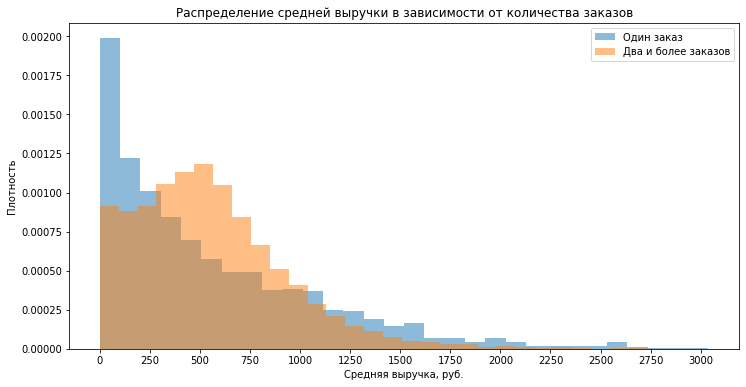

In [118]:
plt.figure(figsize=(12,6))
one['avg_revenue_rub'].plot(kind='hist',
                label ='Один заказ',                 
                alpha=0.5,
                bins=30, 
                density=True)
two['avg_revenue_rub'].plot(kind='hist',
                label ='Два и более заказов',                 
                alpha=0.5,
                bins=30,
                density=True)
plt.xlabel('Средняя выручка, руб.')
plt.xticks(range(0, 3250, 250))
plt.ylabel('Плотность')
plt.title('Распределение средней выручки в зависимости от количества заказов')
plt.legend()
plt.show()

Ответим на вопросы:
- В каких диапазонах средней выручки концентрируются пользователи из каждой группы?
  - Основная концентрация средней выручки для пользователей, совершивших один заказ, находится в диапазоне от 0 до 500 руб.
  - Основная концентрация средней выручки для пользователей, совершивших два и более заказа, находится в диапазоне от 300 до 750 руб.
- Есть ли различия между группами?
  - Пользователи с одним заказом чаще совершают покупки с низкой стоимостью (до 250 руб.), средняя цена покупки пользователей, совершивших две и более покупки, выше.
  - Средняя цена покупки у пользователей, совершивших две и более покупки, выше, чем у пользователей с одной покупкой.
  - Оба распределения скошены вправо, имеют длинный узкий правый хвост, но у пользователей с двумя и более заказами распределение имеет пик (мат. ожидание) правее и более сплющенное (больше дисперсия)

**Шаг 4.2.2. Сравним распределение по средней выручке с заказа в двух группах пользователей.**

- совершившие 2–4 заказа;
- совершившие 5 и более заказов.

Ответим на вопрос: есть ли различия по значению средней выручки с заказа между пользователями этих двух групп?

Создадим выборки пользователей по группам:

In [119]:
two_to_four = user_profile[user_profile['is_two'] == 1 & (user_profile['is_five'] == 0)]
five = user_profile[(user_profile['is_five'] == 1)]

Построим сравнительные гистограммы распределения средней выручки с билета (`avg_revenue_rub`):

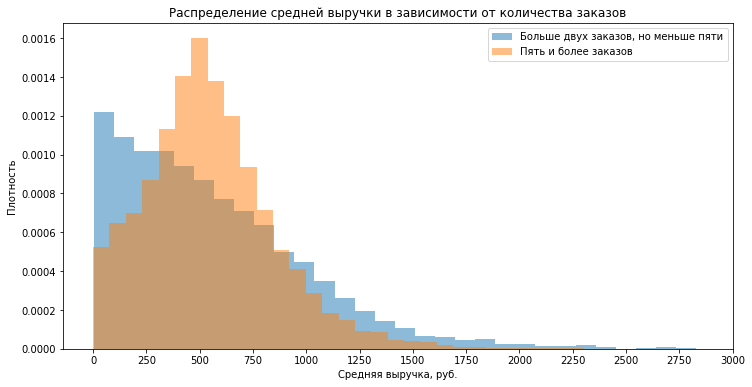

In [120]:
plt.figure(figsize=(12,6))
two_to_four['avg_revenue_rub'].plot(kind='hist',
                label ='Больше двух заказов, но меньше пяти',                 
                alpha=0.5,
                bins=30, 
                density=True)
five['avg_revenue_rub'].plot(kind='hist',
                label ='Пять и более заказов',                 
                alpha=0.5,
                bins=30,
                density=True)
plt.xlabel('Средняя выручка, руб.')
plt.xticks(range(0, 3250, 250))
plt.ylabel('Плотность')
plt.title('Распределение средней выручки в зависимости от количества заказов')
plt.legend()
plt.show()

Ответим на вопрос: есть ли различия по значению средней выручки с заказа между пользователями этих двух групп?
- Основная концентрация средней выручки для пользователей, совершивших более двух заказов, но менее пяти, находится в диапазоне от 0 до 800 руб.
- Основная концентрация средней выручки для пользователей, совершивших пять и более заказов, находится в диапазоне от 300 до 750 руб.
- Среднее значение выручки больше для пользователей, совершивших пять и более заказов - более активные пользователи готовы тратить на покупки больше.
- Распределение для пользователей, совершивших более двух заказов, но менее пяти, имеет более экспоненциальный характер (хотя оно явно лог-нормальное) (т. е. более отвечает распределениям массового обслуживания и является по сути более стабильным и предсказуемым).

**Шаг 4.2.3. Проанализируем влияние среднего количества билетов в заказе на вероятность повторной покупки.**

- Изучим распределение пользователей по среднему количеству билетов в заказе (`avg_tickets_count`) и опишем основные наблюдения.
- Разделим пользователей на несколько сегментов по среднему количеству билетов в заказе:
    - от 1 до 2 билетов;
    - от 2 до 3 билетов;
    - от 3 до 5 билетов;
    - от 5 и более билетов.
- Для каждого сегмента подсчитаем общее число пользователей и долю пользователей, совершивших повторные заказы.
- Ответим на вопросы:
    - Как распределены пользователи по сегментам — равномерно или сконцентрировано?
    - Есть ли сегменты с аномально высокой или низкой долей повторных покупок?

Разделим пользователей на несколько сегментов по среднему количеству билетов в заказе

In [121]:
user_profile.loc[:, 'avg_tickets_count'] = pd.cut(user_profile.loc[:, 'avg_tickets'], bins=[1, 2, 3, 5, 100], labels=['1-2', '2-3', '3-5', '5+'], right=False)

Для каждого сегмента подсчитаем общее число пользователей и долю пользователей, совершивших повторные заказы.

In [122]:
tickets_bins = user_profile.groupby('avg_tickets_count', observed=False).agg(user_count=('user_id', 'count'),is_two=('is_two', 'mean')).reset_index() 

tickets_bins['is_two'] = tickets_bins['is_two'] * 100

tickets_bins = tickets_bins.sort_values('avg_tickets_count').reset_index(drop=True)
tickets_bins

,avg_tickets_count,user_count,is_two
0,1-2,2404,51.289517
1,2-3,9587,73.797851
2,3-5,8909,53.260748
3,5+,472,8.474576


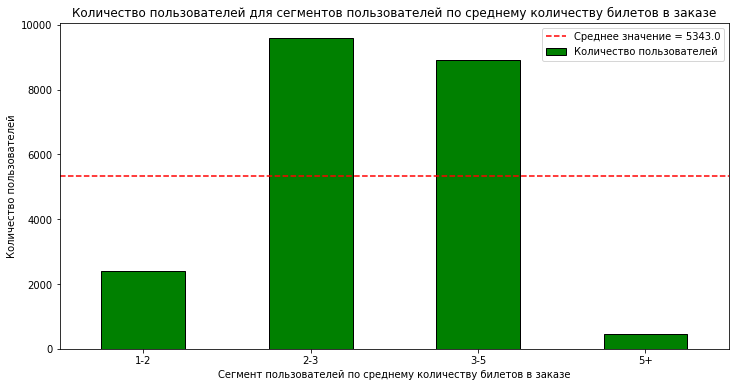

In [123]:
tickets_bins.plot(kind='bar',
				title='Количество пользователей для сегментов пользователей по среднему количеству билетов в заказе',
                legend=False,
                x='avg_tickets_count', y='user_count',
                color='green',
                edgecolor='black',                                      
                xlabel='Сегмент пользователей по среднему количеству билетов в заказе',
                ylabel='Количество пользователей',
                rot=0,
                figsize=(12,6),
                label = 'Количество пользователей')
plt.axline((0,tickets_bins['user_count'].mean()),(12,tickets_bins['user_count'].mean()), color='r', linestyle='--', 
           label=f"Среднее значение = {tickets_bins['user_count'].mean()}")
plt.legend()
plt.show()

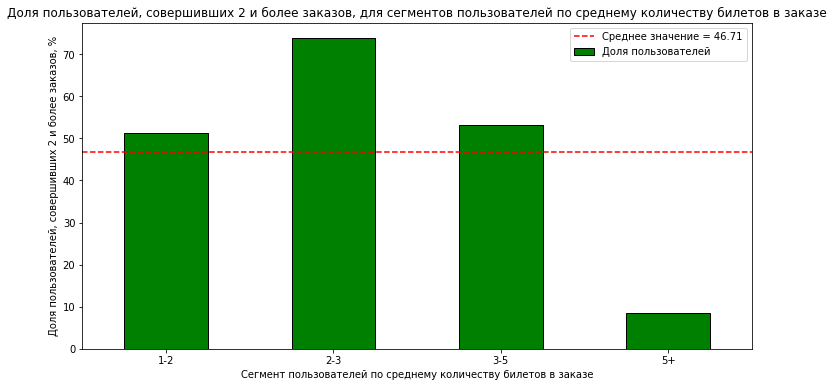

In [124]:
tickets_bins.plot(kind='bar',
				title='Доля пользователей, совершивших 2 и более заказов, для сегментов пользователей по среднему количеству билетов в заказе',
                legend=False,
                x='avg_tickets_count', y='is_two',
                color='green',
                edgecolor='black',                                      
                xlabel='Сегмент пользователей по среднему количеству билетов в заказе',
                ylabel='Доля пользователей, совершивших 2 и более заказов, %',
                rot=0,
                figsize=(12,6),
                label='Доля пользователей')
plt.axline((0,tickets_bins['is_two'].mean()),(12,tickets_bins['is_two'].mean()), color='r', linestyle='--', 
           label=f"Среднее значение = {tickets_bins['is_two'].mean() :.2f}")
plt.legend()
plt.show()

- Ответим на вопросы:
    - Как распределены пользователи по сегментам — равномерно или сконцентрировано?
      - Пользователи распределены по сегментам неравномерно, основная масса пользователей - в сегментах 2-3 и 3-5, сегмент 1-2 средний, а сегмент 5+ самый малый. Ожидаемо большие группы (более 5 человек) встречаются реже, чем группы от 2 до 5 человек, небольшие группы от 1 до 2 человек вероятно тоже реже посещают мероприятия.
    - Есть ли сегменты с аномально высокой или низкой долей повторных покупок?
      - Сегмент 2-3 (74%) имеет аномально высокую долю повтроных покупок (средняя доля повторных покупок - 47%). Этот сегмент вероятно представлен небольшими семейными группами или дружескими компаниями, имеющими большую лояльность.
      - Сегмент 5+ (8.5%) имеет аномально низкую долю повтроных покупок (средняя доля повторных покупок - 47%). Этот сегмент вероятно представлен большими группами из организаций, учебных заведений и т. п. - их лояльность не высока.

#### 4.3. Исследование временных характеристик первого заказа и их влияния на повторные покупки

Изучим временные параметры, связанные с первым заказом пользователей:

- день недели первой покупки;
- время с момента первой покупки — лайфтайм;
- средний интервал между покупками пользователей с повторными заказами.

**Шаг 4.3.1. Проанализируем, как день недели, в которой была совершена первая покупка, влияет на поведение пользователей.**

- По данным даты первого заказа выделим день недели.
- Для каждого дня недели подсчитаем общее число пользователей и долю пользователей, совершивших повторные заказы. Результаты визуализируем.
- Ответим на вопрос: влияет ли день недели, в которую совершена первая покупка, на вероятность возврата клиента?

Сконструируем признак дня недели первого заказа

In [125]:
user_profile['first_order_dayofweek'] = user_profile['first_order_dt'].dt.dayofweek

Сформируем датасет с количеством пользователей и долей совершивших два и боллее заказа пользователей на каждый день недели

Для каждого дня недели подсчитаем общее число пользователей и долю пользователей, совершивших повторные заказы.

In [131]:
dayofweek_bins = user_profile.groupby('first_order_dayofweek', observed=False).agg(
    user_count=('user_id', 'count'),
    two_or_more_share=('is_two', 'mean')
).reset_index()     

dayofweek_bins['two_or_more_share'] = dayofweek_bins['two_or_more_share'] * 100

dayofweek_bins['first_order_dayofweek'] = dayofweek_bins['first_order_dayofweek'].map({
    0: 'Понедельник',   
    1: 'Вторник',
    2: 'Среда',     
    3: 'Четверг',
    4: 'Пятница',
    5: 'Суббота',
    6: 'Воскресенье'
})
dayofweek_bins.head(10)

,first_order_dayofweek,user_count,two_or_more_share
0,Понедельник,2874,62.143354
1,Вторник,3152,61.865482
2,Среда,3040,62.236842
3,Четверг,3086,59.526896
4,Пятница,3217,59.900528
5,Суббота,3268,62.790698
6,Воскресенье,2735,60.292505


Результаты визуализируем.

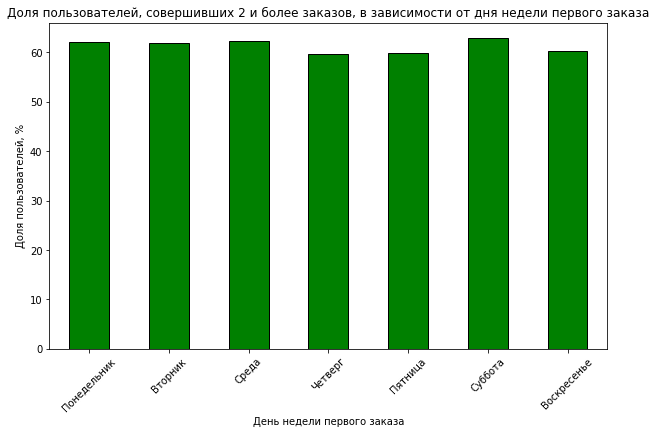

In [134]:
dayofweek_bins_plt = dayofweek_bins.set_index('first_order_dayofweek')

dayofweek_bins_plt['two_or_more_share'].plot(kind='bar',
                title='Доля пользователей, совершивших 2 и более заказов, в зависимости от дня недели первого заказа',
                legend=False,
                x='first_order_dayofweek',
                xlabel='День недели первого заказа', 
                ylabel='Доля пользователей, %',
                rot=45,
                color='green',
                edgecolor='black',                         
                figsize=(10,6))
plt.show()

Ответим на вопрос: влияет ли день недели, в которую совершена первая покупка, на вероятность возврата клиента?
  - День недели первого заказа незначительно (в пределах статистической погрешности) влияет на вероятность возврата клиента. Таким образом, день недели первой покупки не является определяющим фактором для прогнозирования возвратов клиентов.

**Шаг 4.3.2. Изучим, как средний интервал между заказами влияет на удержание клиентов.**

- Рассчитаем среднее время между заказами для двух групп пользователей:
    - совершившие 2–4 заказа;
    - совершившие 5 и более заказов.
- Исследуем, как средний интервал между заказами влияет на вероятность повторного заказа, и сделаем выводы.

Рассчитаем среднее время между заказами для двух групп пользователей: совершившие 2–4 заказа, совершившие 5 и более заказов.

In [136]:
average_days_ge2 = user_profile[(user_profile['is_two'] == 1) & (user_profile['is_five'] == 0)]['days_between_orders']

average_days_ge5 = user_profile[user_profile['is_five'] == 1]['days_between_orders']

Исследуем, как средний интервал между заказами влияет на вероятность повторного заказа, и сделаем выводы

In [138]:
average_days_ge2.describe(percentiles=[0.01, 0.05, 0.25, 0.5, 0.75, 0.95, 0.97, 0.99, 0.995, 0.999])

count    7085.000000
mean       21.358998
std        28.566498
min         0.000000
1%          0.000000
5%          0.000000
25%         0.000000
50%         9.000000
75%        34.000000
95%        84.000000
97%       101.000000
99%       125.000000
99.5%     132.000000
99.9%     143.916000
max       148.000000
Name: days_between_orders, dtype: float64

In [139]:
average_days_ge5.describe(percentiles=[0.01, 0.05, 0.25, 0.5, 0.75, 0.95, 0.97, 0.99, 0.995, 0.999])

count    6008.000000
mean       10.053029
std         7.877738
min         0.000000
1%          0.000000
5%          0.200000
25%         4.000000
50%         8.250000
75%        14.300000
95%        26.200000
97%        28.800000
99%        33.186000
99.5%      34.500000
99.9%      36.500000
max        37.500000
Name: days_between_orders, dtype: float64

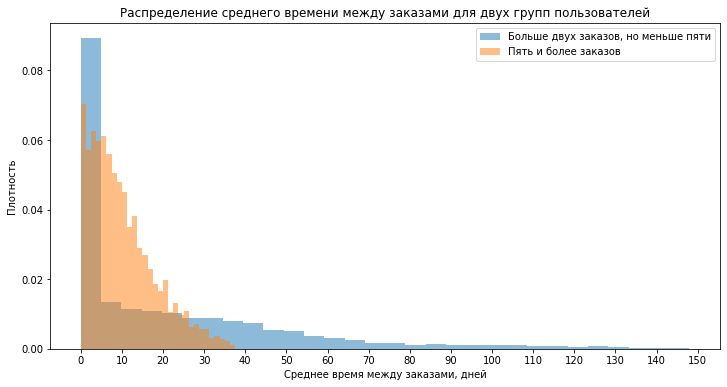

In [143]:
plt.figure(figsize=(12,6))
average_days_ge2.plot(kind='hist',
                label ='Больше двух заказов, но меньше пяти',                 
                alpha=0.5,
                bins=30, 
                density=True)
average_days_ge5.plot(kind='hist',
                label ='Пять и более заказов',                 
                alpha=0.5,
                bins=30,
                density=True)
plt.xlabel('Среднее время между заказами, дней')
plt.xticks(range(0, 160, 10))
plt.ylabel('Плотность')
plt.title('Распределение среднего времени между заказами для двух групп пользователей')
plt.legend()
plt.show()

Судя по гистограмме, выбросов или аномальных значений в выборке нет, выборочное среднее значение будет корректным.

In [144]:
print(f"Среднее время между заказами для пользователей с 2-4 заказами: {average_days_ge2.mean():.2f} дней")
print(f"Среднее время между заказами для пользователей с 5 и более заказами: {average_days_ge5.mean():.2f} дней")

Среднее время между заказами для пользователей с 2-4 заказами: 21.36 дней
Среднее время между заказами для пользователей с 5 и более заказами: 10.05 дней


Вывод по шагу 4.3.2:
- Среднее время между заказами для пользователей с 2-4 заказами: 21.36 дней.
- Среднее время между заказами для пользователей с 5 и более заказами: 10.05 дней.

Пользователи с 5 и более заказами делают заказы чаще (имеют меньшее среднее время между заказами), т. е. обладают большей активностью.

#### 4.4. Корреляционный анализ количества покупок и признаков пользователя

Изучим, какие характеристики первого заказа и профиля пользователя могут быть связаны с числом покупок. Для этого используем универсальный коэффициент корреляции `phi_k`, который позволяет анализировать как числовые, так и категориальные признаки.

**Шаг 4.4.1: Проведем корреляционный анализ.**
- Рассчитаем коэффициент корреляции `phi_k` между признаками профиля пользователя и числом заказов (`total_orders`). При необходимости используем параметр `interval_cols` для определения интервальных данных.
- Проанализируем полученные результаты. Если полученные значения будут близки к нулю, проверим разброс данных в `total_orders`. Такое возможно, когда в данных преобладает одно значение: в таком случае корреляционный анализ может показать отсутствие связей. Чтобы этого избежать, выделим сегменты пользователей по полю `total_orders`, а затем повторим корреляционный анализ. Выделим такие сегменты:
    - 1 заказ;
    - от 2 до 4 заказов;
    - от 5 и выше.
- Визуализируем результат корреляции с помощью тепловой карты.
- Ответим на вопрос: какие признаки наиболее связаны с количеством заказов?

Соберем датасет для анализа

In [146]:
user_profile_phik = user_profile[[
    'first_device',
    'first_region',
    'first_service',                
    'first_event_type',
    'total_orders',
    'avg_revenue_rub',
    'avg_tickets',
    'days_between_orders',
    'is_two',
    'is_five'
]]  

Рассчитаем коэффициент корреляции `phi_k` между признаками профиля пользователя и числом заказов (`total_orders`). При необходимости используем параметр `interval_cols` для определения интервальных данных.

In [148]:
phik_matrix = user_profile_phik.phik_matrix(interval_cols=[
    'total_orders',
    'avg_revenue_rub',
    'avg_tickets',
    'days_between_orders'
])

Визуализируем результат корреляции с помощью тепловой карты

In [149]:
phik_matrix.style.background_gradient(cmap='coolwarm').format("{:.2f}")

,first_device,first_region,first_service,first_event_type,total_orders,avg_revenue_rub,avg_tickets,days_between_orders,is_two,is_five
first_device,1.00,0.11,0.09,0.07,0.02,0.07,0.06,0.01,0.04,0.05
first_region,0.11,1.00,0.70,0.51,0.11,0.35,0.14,0.08,0.09,0.09
first_service,0.09,0.70,1.00,0.59,0.00,0.38,0.09,0.05,0.05,0.06
first_event_type,0.07,0.51,0.59,1.00,0.03,0.32,0.09,0.06,0.03,0.02
total_orders,0.02,0.11,0.00,0.03,1.00,0.23,0.40,0.30,0.32,0.64
avg_revenue_rub,0.07,0.35,0.38,0.32,0.23,1.00,0.49,0.07,0.30,0.33
avg_tickets,0.06,0.14,0.09,0.09,0.40,0.49,1.00,0.18,0.80,0.67
days_between_orders,0.01,0.08,0.05,0.06,0.30,0.07,0.18,1.00,nan,0.46
is_two,0.04,0.09,0.05,0.03,0.32,0.30,0.80,nan,1.00,0.70
is_five,0.05,0.09,0.06,0.02,0.64,0.33,0.67,0.46,0.70,1.00


In [150]:
user_profile_phik['total_orders'].describe(percentiles=[0.01, 0.05, 0.25, 0.5, 0.75, 0.95, 0.97, 0.99, 0.995, 0.999])

count    21372.000000
mean         6.376521
std         13.912898
min          1.000000
1%           1.000000
5%           1.000000
25%          1.000000
50%          2.000000
75%          5.000000
95%         26.000000
97%         40.000000
99%         76.290000
99.5%      105.000000
99.9%      139.000000
max        149.000000
Name: total_orders, dtype: float64

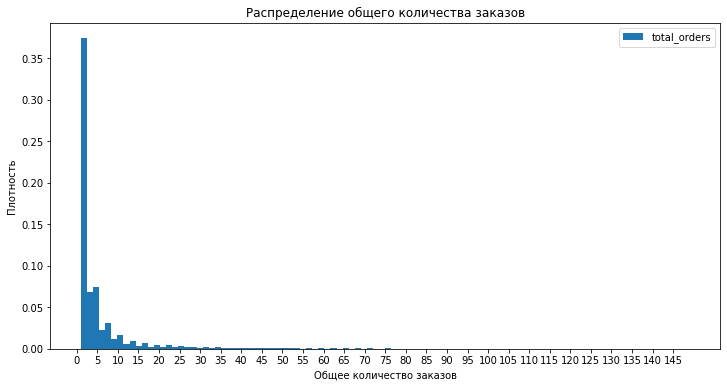

In [161]:
plt.figure(figsize=(12,6))
user_profile_phik['total_orders'].plot(kind='hist',                
                bins=100, 
                density=True)
plt.xlabel('Общее количество заказов')
plt.xticks(range(0, 150, 5))
plt.ylabel('Плотность')
plt.title('Распределение общего количества заказов')
plt.legend()
plt.show()

Проанализируем полученные результаты: 
- Полученные значения отличны от нуля, но значимо велики в основном для сконструированных по количесту заказов признаков сегментов (не интересных для анализа), 
- Разброс данных в total_orders - в данных есть определенное преобладание некоторых значений.

Выделим сегменты пользователей по полю total_orders, а затем повторим корреляционный анализ. 
Выделим такие сегменты:
1 заказ;
от 2 до 4 заказов;
от 5 и выше.

In [162]:
user_profile['total_orders_bins'] = pd.cut(user_profile['total_orders'], bins=[1, 2, 5, 9999999], labels=['1', '2-4', '5+'], right=False, include_lowest=True)

In [163]:
user_profile[['total_orders', 'total_orders_bins']].head(10)

,total_orders,total_orders_bins
0,1,1
1,2,2-4
2,3,2-4
3,1,1
4,2,2-4
5,13,5+
6,2,2-4
7,1,1
8,3,2-4
9,2,2-4


In [164]:
user_profile_phik = user_profile[[
    'first_device',
    'first_region',
    'first_service',                
    'first_event_type',
    'total_orders',
    'total_orders_bins',
    'avg_revenue_rub',
    'avg_tickets',
    'days_between_orders',
    'is_two',
    'is_five'
]]  

In [166]:
phik_matrix = user_profile_phik.phik_matrix(interval_cols=[
    'total_orders',
    'avg_revenue_rub',
    'avg_tickets',
    'days_between_orders'
])

In [167]:
phik_matrix.style.background_gradient(cmap='coolwarm').format("{:.2f}")

,first_device,first_region,first_service,first_event_type,total_orders,total_orders_bins,avg_revenue_rub,avg_tickets,days_between_orders,is_two,is_five
first_device,1.00,0.11,0.09,0.07,0.02,0.02,0.07,0.06,0.01,0.04,0.05
first_region,0.11,1.00,0.70,0.51,0.11,0.13,0.35,0.14,0.08,0.09,0.09
first_service,0.09,0.70,1.00,0.59,0.00,0.08,0.38,0.09,0.05,0.05,0.06
first_event_type,0.07,0.51,0.59,1.00,0.03,0.04,0.32,0.09,0.06,0.03,0.02
total_orders,0.02,0.11,0.00,0.03,1.00,0.50,0.23,0.40,0.30,0.32,0.64
total_orders_bins,0.02,0.13,0.08,0.04,0.50,1.00,0.32,0.66,0.39,1.00,1.00
avg_revenue_rub,0.07,0.35,0.38,0.32,0.23,0.32,1.00,0.49,0.07,0.30,0.33
avg_tickets,0.06,0.14,0.09,0.09,0.40,0.66,0.49,1.00,0.18,0.80,0.67
days_between_orders,0.01,0.08,0.05,0.06,0.30,0.39,0.07,0.18,1.00,nan,0.46
is_two,0.04,0.09,0.05,0.03,0.32,1.00,0.30,0.80,nan,1.00,0.70


Повторный корреляционный анализ дал более читаемые результаты.

Вывод по шагу 4.4.1:

1. Наибольшая связь с общим количеством заказов (`total_orders`, да и с `total_orders_bins` картина похожая) у признаков `is_two`, `is_five`, однако анализ этой связи бессмысленен, т. к. это по определению сконструированные сегменты по количеству заказов.


2. Наибольшая связь со значимыми признаками (по результатам повторного корреляционного анализа по сконструированной колонке `total_orders_bins`):
  - `avg_tickets` (0.66) - пользователи с большим средним количеством билетов в покупке отностяся к более лояльным сегментам (см. более ранние шаги анализа),
  
  - `days_between_orders` (0.39) - большая частота покупок указывает на более регулярную активность,
  
  - `revenue_rub` (0.32) - средняя выручка с заказа больше для более активных пользователей (см. шаг 4.2).

### 5. Общий вывод и рекомендации

В конце проекта напишите общий вывод и рекомендации: расскажите заказчику, на что нужно обратить внимание. В выводах кратко укажите:

- **Информацию о данных**, с которыми вы работали, и то, как они были подготовлены: например, расскажите о фильтрации данных, переводе тенге в рубли, фильтрации выбросов.
- **Основные результаты анализа.** Например, укажите:
    - Сколько пользователей в выборке? Как распределены пользователи по числу заказов? Какие ещё статистические показатели вы подсчитали важным во время изучения данных?
    - Какие признаки первого заказа связаны с возвратом пользователей?
    - Как связаны средняя выручка и количество билетов в заказе с вероятностью повторных покупок?
    - Какие временные характеристики влияют на удержание (день недели, интервалы между покупками)?
    - Какие характеристики первого заказа и профиля пользователя могут быть связаны с числом покупок согласно результатам корреляционного анализа?
- Дополните выводы информацией, которая покажется вам важной и интересной. Следите за общим объёмом выводов — они должны быть компактными и ёмкими.

В конце предложите заказчику рекомендации о том, как именно действовать в его ситуации. Например, укажите, на какие сегменты пользователей стоит обратить внимание в первую очередь, а какие нуждаются в дополнительных маркетинговых усилиях.

### Загрузка данных и их предобработка

1. Размер данных Яндекс Афиши: 290611 строк и 14 столбцов, занимаемый объем - 31 Мб. Данные соответствуют описанию, названия колонок соответствуют содержимому. Предварительно сформулированы стратегии оптимизации датасета, чистки дубликатов и выборосов.
2. Загружены данные крса казахского теньге за 2024 год и произведен пересчет в данных Яндекс Афиши выручки из казахского теньге в российский рубль на дату операции. В итоге в датасете сконструирована колонка `revenue_rub`.
3. Отфильтрованы выбросы в колонках `tickets_count` по 0.999 квантилю и `revenue_rub` по 0.995 квантилю.

### Создание профиля пользователя
1. Построены агрегированные признаки, описывающие поведение и профиль каждого пользователя.
2. Проанализировали данные профилей пользователей:
- Общее число пользователей: 21588
- Средняя выручка с одного заказа: 554.74 руб.
- Доля пользователей с 2 и более заказами: 61.65%
- Доля пользователей с 5 и более заказами: 28.83%

### Исследовательский анализ данных
1. Исследовали признаки, описывающие первый заказ пользователя, и выяснили, влияют ли они на вероятность возвращения пользователя: 
- Распределение пользователей по всем признакам **неравномерное**.  
- Есть выраженные **точки входа**:
  - Концерты по типу мероприятия  
  - Мобильные устройства  
  - Каменевский район и Североярская область  
  - Крупные билетные операторы («Билеты без проблем», «Мой билет», «Лови билет!»)  
- Эти сегменты включают наибольшее число пользователей и являются важнейшими для проведения анализа поведения пользователей и выбработки бизнес-стратегий.
2. Провели анализ доли пользователей, совершивших 2 или более заказа, по основным сегментам (с визуализацией результатов):
- по типу их первого мероприятия:
  - сегменты театр, концерты являются успешными «точками входа» — сегментами, в которых пользователи чаще совершают повторный заказ (63.65% и 61.71% соответственно), чем в среднем по выборке (61.26%).
- по типу устройства, с которого совершена первая покупка:
  - сегмент desktop является успешной «точкой входа» — сегментом, в котором пользователи чаще совершают повторный заказ (63.85%), чем в среднем по выборке (61.26%).
- по региону проведения мероприятия из первого заказа:
  - Каменевский регион, Североярская область, оба этих сегмента также являются успешными «точками входа» — сегментами, в которых пользователи чаще совершают повторный заказ (61.79% и 63.93% соответственно), чем в среднем по выборке (61.26%).
- по билетному оператору, продавшему билеты на первый заказ:
  - крупные операторы Лови билет!, Билеты в руки, Облачко являются успешными «точками входа» — сегментами, в которых пользователи чаще совершают повторный заказ (61.34%, 62.52% и 61.37% соответственно), чем в среднем по выборке (61.26%).
3. Проверили продуктовые гипотезы:
- Гипотеза 1. Тип мероприятия влияет на вероятность возврата на Яндекс Афишу: пользователи, которые совершили первый заказ на спортивные мероприятия, совершают повторный заказ чаще, чем пользователи, оформившие свой первый заказ на концерты.
- Гипотеза 2. В регионах, где больше всего пользователей посещают мероприятия, выше доля повторных заказов, чем в менее активных регионах.
Обе гипотезы не подтвердились.
4. Ответили на вопросы:
- В каких диапазонах средней выручки концентрируются пользователи из каждой группы?
  - Основная концентрация средней выручки для пользователей, совершивших один заказ, находится в диапазоне от 0 до 500 руб.
  - Основная концентрация средней выручки для пользователей, совершивших два и более заказа, находится в диапазоне от 300 до 750 руб.
- Есть ли различия между группами?
  - Пользователи с одним заказом чаще совершают покупки с низкой стоимостью (до 250 руб.), средняя цена покупки пользователей, совершивших две и более покупки, выше.
  - Средняя цена покупки у пользователей, совершивших две и более покупки, выше, чем у пользователей с одной покупкой.
  - Оба распределения скошены вправо, имеют длинный узкий правый хвост, но у пользователей с двумя и более заказами распределение имеет пик (мат. ожидание) правее и более сплющенное (больше дисперсия)
- Есть ли различия по значению средней выручки с заказа между пользователями этих двух групп?
  - Основная концентрация средней выручки для пользователей, совершивших более двух заказов, но менее пяти, находится в диапазоне от 0 до 800 руб.
  - Основная концентрация средней выручки для пользователей, совершивших пять и более заказов, находится в диапазоне от 300 до 750 руб.
  - Среднее значение выручки больше для пользователей, совершивших пять и более заказов - более активные пользователи готовы тратить на покупки больше.
  - Распределение для пользователей, совершивших более двух заказов, но менее пяти, имеет более экспоненциальный характер (хотя оно явно лог-нормальное) (т. е. более отвечает распределениям массового обслуживания и является по сути более стабильным и предсказуемым).
- Как распределены пользователи по сегментам — равномерно или сконцентрировано?
  - Пользователи распределены по сегментам неравномерно, основная масса пользователей - в сегментах 2-3 и 3-5, сегмент 1-2 средний, а сегмент 5+ самый малый. Ожидаемо большие группы (более 5 человек) встречаются реже, чем группы от 2 до 5 человек, небольшие группы от 1 до 2 человек вероятно тоже реже посещают мероприятия.
- Есть ли сегменты с аномально высокой или низкой долей повторных покупок?
  - Сегмент 2-3 (74%) имеет аномально высокую долю повторных покупок (средняя доля повторных покупок - 47%). Этот сегмент вероятно представлен небольшими семейными группами или дружескими компаниями, имеющими большую лояльность.
  - Сегмент 5+ (8.5%) имеет аномально низкую долю повтроных покупок (средняя доля повторных покупок - 47%). Этот сегмент вероятно представлен большими группами из организаций, учебных заведений и т. п. - их лояльность не высока.  
- Влияет ли день недели, в которую совершена первая покупка, на вероятность возврата клиента?
  - День недели первого заказа незначительно (в пределах статистической погрешности) влияет на вероятность возврата клиента. Таким образом, день недели первой покупки не является определяющим фактором для прогнозирования возвратов клиентов.
  
5. Исследовали, как средний интервал между заказами влияет на вероятность повторного заказа: Пользователи с 5 и более заказами делают заказы чаще (имеют меньшее среднее время между заказами), т. е. обладают большей активностью.


6. Провели корреляционный анализ между признаками профиля пользователя и числом заказов (`total_orders`): 
 - Наибольшая связь со значимыми признаками (по результатам повторного корреляционного анализа по сконструированной колонке `total_orders_bins`):
   - `avg_tickets` (0.66) - пользователи с большим средним количеством билетов в покупке отностяся к более лояльным сегментам (см. более ранние шаги анализа),
  
   - `days_between_orders` (0.39) - большая частота покупок указывает на более регулярную активность,
  
   - `revenue_rub` (0.32) - средняя выручка с заказа больше для более активных пользователей (см. шаг 4.2).

## Рекомендации бизнесу
1. Основные сегменты воздействия: Концерты и театр по типу мероприятия, Мобильные устройства, Каменевский район и Североярская область, Крупные билетные операторы. Предлагать таргетированную рекламму.


2. Сегменты пользователей, наиболее связанные с возвратом:
 - Пользователи со средним количеством билетов 2-3 - семейные и дружеские группы - предлагать скидки и акции для семей, программы лояльности по типу "приведи друзей", 
 - Пользователи с более короткими интервалами между покупками - программы лояльности для активных паользователей - баллы, скидки и т. п., 
 - Пользователи с большей средней выручкой - кэш-бэк в баллах.

### 6. Финализация проекта и публикация в Git

Когда вы закончите анализировать данные, оформите проект, а затем опубликуйте его.

Выполните следующие действия:

1. Создайте файл `.gitignore`. Добавьте в него все временные и чувствительные файлы, которые не должны попасть в репозиторий.
2. Сформируйте файл `requirements.txt`. Зафиксируйте все библиотеки, которые вы использовали в проекте.
3. Вынести все чувствительные данные (параметры подключения к базе) в `.env`файл.
4. Проверьте, что проект запускается и воспроизводим.
5. Загрузите проект в публичный репозиторий — например, на GitHub. Убедитесь, что все нужные файлы находятся в репозитории, исключая те, что в `.gitignore`. Ссылка на репозиторий понадобится для отправки проекта на проверку. Вставьте её в шаблон проекта в тетрадке Jupyter Notebook перед отправкой проекта на ревью.

**Вставьте ссылку на проект в этой ячейке тетрадки перед отправкой проекта на ревью.**